***
# IBM CAPSTONE PROJECT: Bank Campaign Analysis
 
______________________________________________________________________________

## Contents:

### **> PART 1 - Introduction**

* **1.1 Use Case**


* **1.2 Data Set**
    
    
### **> PART 2 - Data Exploration & Preparation**
* **2.1) STEP 0:  Environment Setup**


* **2.2) STEP 1:  Extract, Transform, Load**


* **2.3) STEP 2:  Data Quality Assessment**
    * *STEP 2A: Frequency Tables*
    * *STEP 2B: Frequency Plots and Histograms*
    * *STEP 2C: Correlation Plots*
    * *STEP 2D: Ad-Hoc Exploration*
    * *STEP 2E: Transformations*
    * *STEP 2F: Data Quality Conclusions*
        
        
### **> PART 3 - Model Development (Run 1)**
* **3.1) STEP 3:  Feature Engineering**
    * *STEP 3A: One-Hot Encoding*
    * *STEP 3B: Split Data Set into Training and Validation Data*
    
    
* **3.2) STEP 4:  Model Training**
    * *Set Up Modelling and Evaluation Scoring Functions*
    * *STEP 4A (i): Decision Tree Model (M1)*
    * *STEP 4A (ii): Optimizing the Decision Tree Model (M1.1)*
    * *STEP 4B: Logistic Regression Model (M2)*
    * *STEP 4C: SVC Model (M3)*
    * *STEP 4D: Deep Learning Model (Multilayer Perceptron Model M4)*
    * *STEP 4E (i): Ensemble Models: Random Forrest (M5.1)*
    * *STEP 4E (ii): Ensemble Models: Voting (M5.2)*
    * *STEP 4E (iii): Ensemble Models: Voting (No Decision Tree) (M5.3)*


* **3.3) STEP 5:  Model Evaluation & Comparison**
    
    
### **> PART 4 - Model Development (Run 2: using additional Feature Engineering)**
* **4.1) STEP 6:  Feature Engineering**
    * *STEP 6A: Remove Potential Redundancy*
    * *STEP 6B: One-Hot Encoding*
    * *STEP 6C: Binning*
    * *STEP 6D: Scaling*
    * *STEP 6E: Split Data Set into Training and Validation Data*
    
    
* **4.2) STEP 7:  Model Training**
    * *Set Up Modelling and Evaluation Scoring Functions*
    * *Rerunning All Models*


* **4.3) STEP 8:  Model Evaluation & Comparison**
    
    
### **> PART 5 - Model Development (Run 3: using Oversampling)**
* **5.1) STEP 9:  Feature Engineering**
    * *STEP 9A: Split Data Set into Training and Validation Data (Oversampling)*
    
    
* **5.2) STEP 10:  Model Training**
    * *Set Up Modelling and Evaluation Scoring Functions*
    * *Rerunning All Models*


* **5.3) STEP 11:  Model Evaluation & Comparison**
    
    
### **> PART 6 - Model Development (Run 4: using Undersampling)**
* **6.1) STEP 12:  Feature Engineering**
    * *STEP 9A: Split Data Set into Training and Validation Data (Undersampling)*
    
    
* **6.2) STEP 13:  Model Training**
    * *Set Up Modelling and Evaluation Scoring Functions*
    * *Rerunning All Models*


* **6.3) STEP 14:  Model Evaluation & Comparison**


### **> PART 7 - Selection & Final Result**
* **7.1) STEP 15:  Model Selection**


* **7.2) STEP 16:  Model Explainability**
    * *Surrogate Model (Using a Decision Tree (Pruned to Depth 4))*


* **7.3) STEP 17:  Final Result**


***
# PART 1 - Introduction
***

## 1.1)  Use Case

A Portuguese bank is looking to understand which existing customers they should prioritize and target for their next campaign into term deposits. They have supplied a csv with information of previous telephone campaigns to promote these products. Each record is associated with a customer and the interaction with them – ie whether or not a term deposit was subscribed to as result of the campaign interaction. They have included macro-economic variables as well. They are interested in the type of models that can be used to most successfully increase the rate of response from customers in future campaigns.

This is essentially a classification goal, to predict if a customer will subscribe (yes/no) to a term deposit (variable y) upon being contacted by the bank. So I will use the following types of predictive and machine learning models to assess the classification of these, and then evaluate and assess the best model: Decision Trees, Logistic Regression, Linear Support Vector Classifiers, Deep Learning (multilayer perceptron model), Random Forests, Voting Ensemble Models. 

## 1.2)  Data Set
The data was collected over a series of different campaigns over a year. it can be downloaded from here: https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

Multiple contacts occurred during campaigns and each record represents each customer. There is a duration column, which determines the last contact’s duration – but importantly it determines whether a contact has any possibility of resulting in a subscription or not i.e. where there was no value, an outcome was certainly negative. Therefore – it will be used to filter out a training and validation dataset, with the remainder not being used for training or evaluating a model – before the variable is removed from the analysis as a potential predictor. The full description of all data attribute definitions can be found here:  https://archive.ics.uci.edu/ml/datasets/Bank+Marketing.

***
# Part 2 - Data Exploration & Preparation
***

## 2.1) STEP 0: Environment Setup

In [1]:
import tensorflow as tf
if tf.__version__ != '2.2.0-rc0':
    !pip install tensorflow==2.2.0rc0
    
#restart kernel by clicking on "Kernel"->"Restart and Clear Outout" 
#and wait until all output disapears, then skip this step on next run.

In [ ]:
import tensorflow as tf
print("tensorflow version is: ",tf.__version__)
if tf.__version__ == '2.2.0-rc0':

    !pip install pyspark==2.4.5
    !pip uninstall numpy -y
    !pip uninstall sklearn -y
    !pip uninstall pandas -y
    !pip install pandas==1.0.5
    !pip install scikit-learn==0.23.1
    !pip install numpy==1.19.0
    !pip install tabulate
    !pip install scikit-plot
    !pip uninstall -y seaborn
    !pip install seaborn==0.10.1
    !pip install imbalanced-learn #required for SMOTE function for handling imbalanced target classes

else: 
    print("Perform first step and restart kernel")
    #Otherwise Exit code run
    import sys 
    sys.exit()

In [2]:
# Spark Session, Pipeline, Functions, and Metrics
from pyspark import SparkContext, SparkConf
from pyspark.sql import SQLContext
from pyspark.ml.feature import StringIndexer, StandardScaler, VectorAssembler
from pyspark.ml import Pipeline
from pyspark.sql.functions import rand
from pyspark.mllib.evaluation import MulticlassMetrics

# Keras / Deep Learning
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import optimizers, regularizers
from tensorflow.keras.optimizers import Adam

# Standard functions / data processing / mathematical methods
import numpy as np
import pandas as pd
import time, os
from datetime import timedelta
import math
import statistics

# Visualisation / Modelling
import matplotlib.pyplot as plt
import sklearn as skl  
from sklearn import tree, metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.tree import plot_tree # Import Decision Tree Visualision library
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function

print("sklearn version is: ",skl.__version__)
print("pandas version is: ",pd.__version__)
print("numpy version is: ",np.__version__)
print("sklearn version is: ",skl.__version__)
print("sklearn packages are:", skl.__all__)

sklearn version is:  0.23.1
pandas version is:  1.0.5
numpy version is:  1.19.0
sklearn version is:  0.23.1
sklearn packages are: ['calibration', 'cluster', 'covariance', 'cross_decomposition', 'datasets', 'decomposition', 'dummy', 'ensemble', 'exceptions', 'experimental', 'externals', 'feature_extraction', 'feature_selection', 'gaussian_process', 'inspection', 'isotonic', 'kernel_approximation', 'kernel_ridge', 'linear_model', 'manifold', 'metrics', 'mixture', 'model_selection', 'multiclass', 'multioutput', 'naive_bayes', 'neighbors', 'neural_network', 'pipeline', 'preprocessing', 'random_projection', 'semi_supervised', 'svm', 'tree', 'discriminant_analysis', 'impute', 'compose', 'clone', 'get_config', 'set_config', 'config_context', 'show_versions']


## 2.2) STEP 1: Extract, Transform, Load

In [3]:
# Test is this is being run on IBM or locally
IBM = not(os.path.isdir(r"C:\Users\harsh\Desktop\Harsha"))

if IBM:
    import types
    import pandas as pd
    from botocore.client import Config
    import ibm_boto3

    def __iter__(self): return 0

    # @hidden_cell
    # The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
    # You might want to remove those credentials before you share the notebook.
    client_9b0b28af297148359724c6a2cebea272 = ibm_boto3.client(service_name='s3',
        ibm_api_key_id='OzL9qbBg5cMM_1v-gXVtih1cFbWmltPVneM3lci2W4cR',
        ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
        config=Config(signature_version='oauth'),
        endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

    body = client_9b0b28af297148359724c6a2cebea272.get_object(Bucket='default-donotdelete-pr-wtmdotcldjz8su',Key='bank-additional-full.csv')['Body']
    # add missing __iter__ method, so pandas accepts body as file-like object
    if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )
else:
    body = r'C:\Users\harsh\Desktop\BankAdditional\bank-additional\bank-additional-full.csv'

df = pd.read_csv(body,sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## 2.3) STEP 2: Data Quality Assessment

### *STEP 2A: Frequency Tables*

In [4]:
df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,41188,NaN,NaN,NaN,40.0241,10.4212,17,32,38,47,98
job,41188,12,admin.,10422,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,41188,4,married,24928,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,41188,8,university.degree,12168,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,41188,3,no,32588,NaN,NaN,NaN,NaN,NaN,NaN,NaN
housing,41188,3,yes,21576,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan,41188,3,no,33950,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contact,41188,2,cellular,26144,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,41188,10,may,13769,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day_of_week,41188,5,thu,8623,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
def title(text,page_padding = 90):
    print('')
    print('-'*page_padding)
    print((text.upper()).center(page_padding, ' '))
    print('-'*page_padding)
    print('')
       
def data_quality_summary(df, Target=''):

    #df.describe(include=all)
    
    # Set Top number (x) of values to output in [Top x Values] column:
    Top_Values = 3
    
    #PRINT TITLE AND HIGH LEVEL STATS
    title(text='DATA QUALITY SUMMARY (ordered by type and position)')
    row_num = df.shape[0]
    print("Rows:", f"{df.shape[0]:,}")
    print("Cols:", f"{df.shape[1]:,}")
       
    #SET COLUMN NAMES FOR SUMMARY TABLE
    if Top_Values < 1: Top_Values_Txt = ''
    else: Top_Values_Txt = ' (1\u2192' + str(Top_Values) + ') '
    Top_Values_Column = 'Top ' + str(Top_Values) + ' Modal Values' + Top_Values_Txt
    data_quality = pd.DataFrame(columns=['Column Name','Type','Role','Unique Values',
                                         'Null Counts','Blank Counts', 'Zeros Counts',
                                         'Min \u2192 Max','Med','Mean (\u03BC)','Std (\u03C3)', 
                                         Top_Values_Column])

    #DEFINE FORMATS (for numeric columns)
    def format_num(x):
        if isinstance(x, int): x = f"{x:,}"
        elif abs(x) > 1:       x = "{:,.1f}".format(x).strip(" ")
        elif abs(x) < 1:       x = "{:,.4f}".format(x).strip(" ")
        if x == "0.0000": x="0"
        return x

    #SET TABLE VALUES
    for col in df.columns:

        #SET TYPES
        #Check for highlevel field types
        if  np.issubdtype(df[col].dtype, np.datetime64): 
            Type = 'DateTime ' +  str(df[col].dtype)
        elif np.issubdtype(df[col].dtype, np.number): 
            Type = 'Num ' + str(df[col].dtype)
        else: Type = 'Char'

        #SET ROLES
        Role=[]        
        
        #Check for Target:
        if col == Target: Role.append('TARGET')
            
        #Check for Primary Key and IDs:
        if Type == 'Char': 
              Uniques = df[col].str.strip(" ").nunique()
        else: Uniques = df[col].nunique()
        if Uniques == row_num: Role.append('(Primary Key)')
        elif any(word in col.upper() for word in ["ID", "IDENTIFIER", "INDEX"
                                                "PK", "PRIMARY KEY", "FK", "FOREIGN KEY"]): 
            if any(word not in col.upper() for word in ["IDX"]): Role.append('ID') 

        #Check for Binary Flags / Nominals:
        #Set flag unique values per field limit which indicates a flag
        flag_lim = 20
        if Uniques == 2: Role.append('Binary Flag')
        elif Uniques > 2 and Uniques <= flag_lim and str(df[col].dtype)[0:3] in ("int","obj","cat"): Role.append('Nominal') 
        elif any(word in col.upper() for word in ["FLAG"]): Role.append('Nominal')  
        elif Uniques > flag_lim and str(df[col].dtype)[0:3] in ("obj","cat"): Role.append('Consider Rejecting')

        #Check for Geographic Fields
        if any(word in col.upper() for word in ["COUNTRY", "COUNTY", "STATE", "TERRITOR", "NATION", "REGION",
                                                "PROVINC", "DISTRICT", "CITY", "TOWN", "VILLAGE", "AREA CODE",
                                                "ZIP", "POSTCODE", "POST CODE", "POSTAL", "OUTCODE", "OUT CODE",
                                                "LONGITUDE","LATITUDE","LONG","LAT",
                                                "GEOCOORDINATE", "GEO COORDINATE", "GEO", "GEO CODE",
                                                "LOCATION", "LOC",
                                                "AIRPORT", "CBSA","MSA","NUTS" 
                                               ]): Role.append('Geographic') 
            
        #Check for Numeric Types
        if Role == [] and Type[0:3] == 'Num': Role.append('Continuous')

            
        #Top Values
        #Build list of top frequent VALUES and join into a string separated by commas (then split into a list)
        #return counts ordered my most frequent value (left to right) and include Nulls
        if Type[0:4] == 'Char':
            list1 = ", ".join(str(elm) for elm in df[col].value_counts(sort=True,ascending=False, dropna=False).index.tolist()[0:Top_Values]).split(", ")
        else:
            list1 = ", ".join(str(format_num(elm)) for elm in df[col].value_counts(sort=True,ascending=False, dropna=False).index.tolist()[0:Top_Values]).split(", ")
        
        #Build list of top frequent COUNTS and join into a string separated by commas (then split into a list)
        #return counts ordered my most frequent value (left to right) and include Nulls
        list2 = ", ".join(str(elm) for elm in df[col].value_counts(sort=True,ascending=False, dropna=False).tolist()[0:3]).split(", ")

        Top_Values_String = []
        for x in range(0,len(list1)):
            Top_Values_String.append(list1[x] + " (" + f"{int(list2[x])/row_num:,.1%}" + ")")
        Top_Values_String = ", ".join(Top_Values_String).strip('[]')

            
        #Initialise Numeric and Categorical Column Metrics
        Med_Val, Mean_Val, Std_Val, Min_to_Max, zero_count, blank_count = "","","","","",""
        if str(df[col].dtype)[0:3] in ("int","flo"):
            
            #SET NUMERIC METRICS        
            if Type[0:4] != 'Char': 
                Max_Val   = np.nanmax(df[col].values)
                Min_Val   = np.nanmin(df[col].values)
                Mean_Val  = np.nanmean(df[col].values)
                if Type[0:3] == 'Num':
                    Max_Val  = format_num(Max_Val)
                    Min_Val  = format_num(Min_Val)
                    Mean_Val = format_num(Mean_Val)
                    Med_Val  = format_num(np.nanmedian(df[col].values))
                    Std_Val  = format_num(np.nanstd(df[col].values))

            Min_to_Max = str(Min_Val) + ' \u2192 ' + str(Max_Val)

            #SET ZERO COUNT
            if Type[0:3] == 'Num':
                zero_count = (df[col] == 0).sum(axis=0)
                zero_count = f"{zero_count:,}" + " (" + f"{zero_count/row_num:,.1%}" + ")"
        
        else:
            
            #SET CATEGORICAL METRICS      
            blank_count = (df[col].str.strip(" ") == "").sum(axis=0)     
                
        data_quality = data_quality.append({'Column Name':      col,  
                                            'Type':             Type,
                                            'Role':             ", ".join(Role),
                                            'Unique Values':    f"{Uniques:,}", 
                                            'Null Counts':      f"{df[col].isnull().sum(axis = 0):,}", 
                                            'Blank Counts':     blank_count, 
                                            'Zeros Counts':     zero_count,
                                            'Min \u2192 Max':   Min_to_Max,
                                            'Med':              Med_Val,
                                            'Mean (\u03BC)':    Mean_Val,
                                            'Std (\u03C3)':     Std_Val,
                                            Top_Values_Column:  Top_Values_String
                                           }, ignore_index=True).sort_values(by=['Type','Column Name'])

    return data_quality

data_quality = data_quality_summary(df=df, Target='y')
data_quality.sort_values(by=['Type'])
data_quality


------------------------------------------------------------------------------------------
                   DATA QUALITY SUMMARY (ORDERED BY TYPE AND POSITION)                    
------------------------------------------------------------------------------------------

Rows: 41,188
Cols: 21


,Column Name,Type,Role,Unique Values,Null Counts,Blank Counts,Zeros Counts,Min → Max,Med,Mean (μ),Std (σ),Top 3 Modal Values (1→3)
0,contact,Char,Binary Flag,2,0,0,,,,,,"cellular (63.5%), telephone (36.5%)"
1,day_of_week,Char,Nominal,5,0,0,,,,,,"thu (20.9%), mon (20.7%), wed (19.7%)"
2,default,Char,Nominal,3,0,0,,,,,,"no (79.1%), unknown (20.9%), yes (0.0%)"
3,education,Char,Nominal,8,0,0,,,,,,"university.degree (29.5%), high.school (23.1%)..."
4,housing,Char,Nominal,3,0,0,,,,,,"yes (52.4%), no (45.2%), unknown (2.4%)"
5,job,Char,Nominal,12,0,0,,,,,,"admin. (25.3%), blue-collar (22.5%), technicia..."
6,loan,Char,Nominal,3,0,0,,,,,,"no (82.4%), yes (15.2%), unknown (2.4%)"
7,marital,Char,Nominal,4,0,0,,,,,,"married (60.5%), single (28.1%), divorced (11.2%)"
8,month,Char,Nominal,10,0,0,,,,,,"may (33.4%), jul (17.4%), aug (15.0%)"
9,poutcome,Char,Nominal,3,0,0,,,,,,"nonexistent (86.3%), failure (10.3%), success ..."


**Comments**

previous: 
 * Description: number of contacts performed before this campaign and for this client (numeric).
 * 35.6k (86%) of values are zeros - this is ok, as per business context of the meaning of 0 here.

pdays:
 * Description: number of days that passed by after the client was last contacted from a previous campaign (numeric) 
 * 15 zeros is ok, as per business context of the meaning of 0 here.
 * 96% of values are '999' - 999 means client was not previously contacted. Note, this does not mean client was not contacted during the last campaign - as can be seen by a balanced yes/no target in the below histograms.

### *STEP 2B: Frequency Plots and Histograms*

In [6]:
target_class = 'y'
yes = df[df[target_class]=='yes']
no = df[df[target_class]=='no']
# colours for class 0 and 1 R/G/B/alpha
alpha = 1
colour_class0 = (0.2, 0.4, 0.6, alpha)
colour_class1 = (0.3, 0.9, 0.8, alpha)



------------------------------------------------------------------------------------------
                         FREQUENCY PLOTS FOR CATEGORICAL COLUMNS                          
------------------------------------------------------------------------------------------



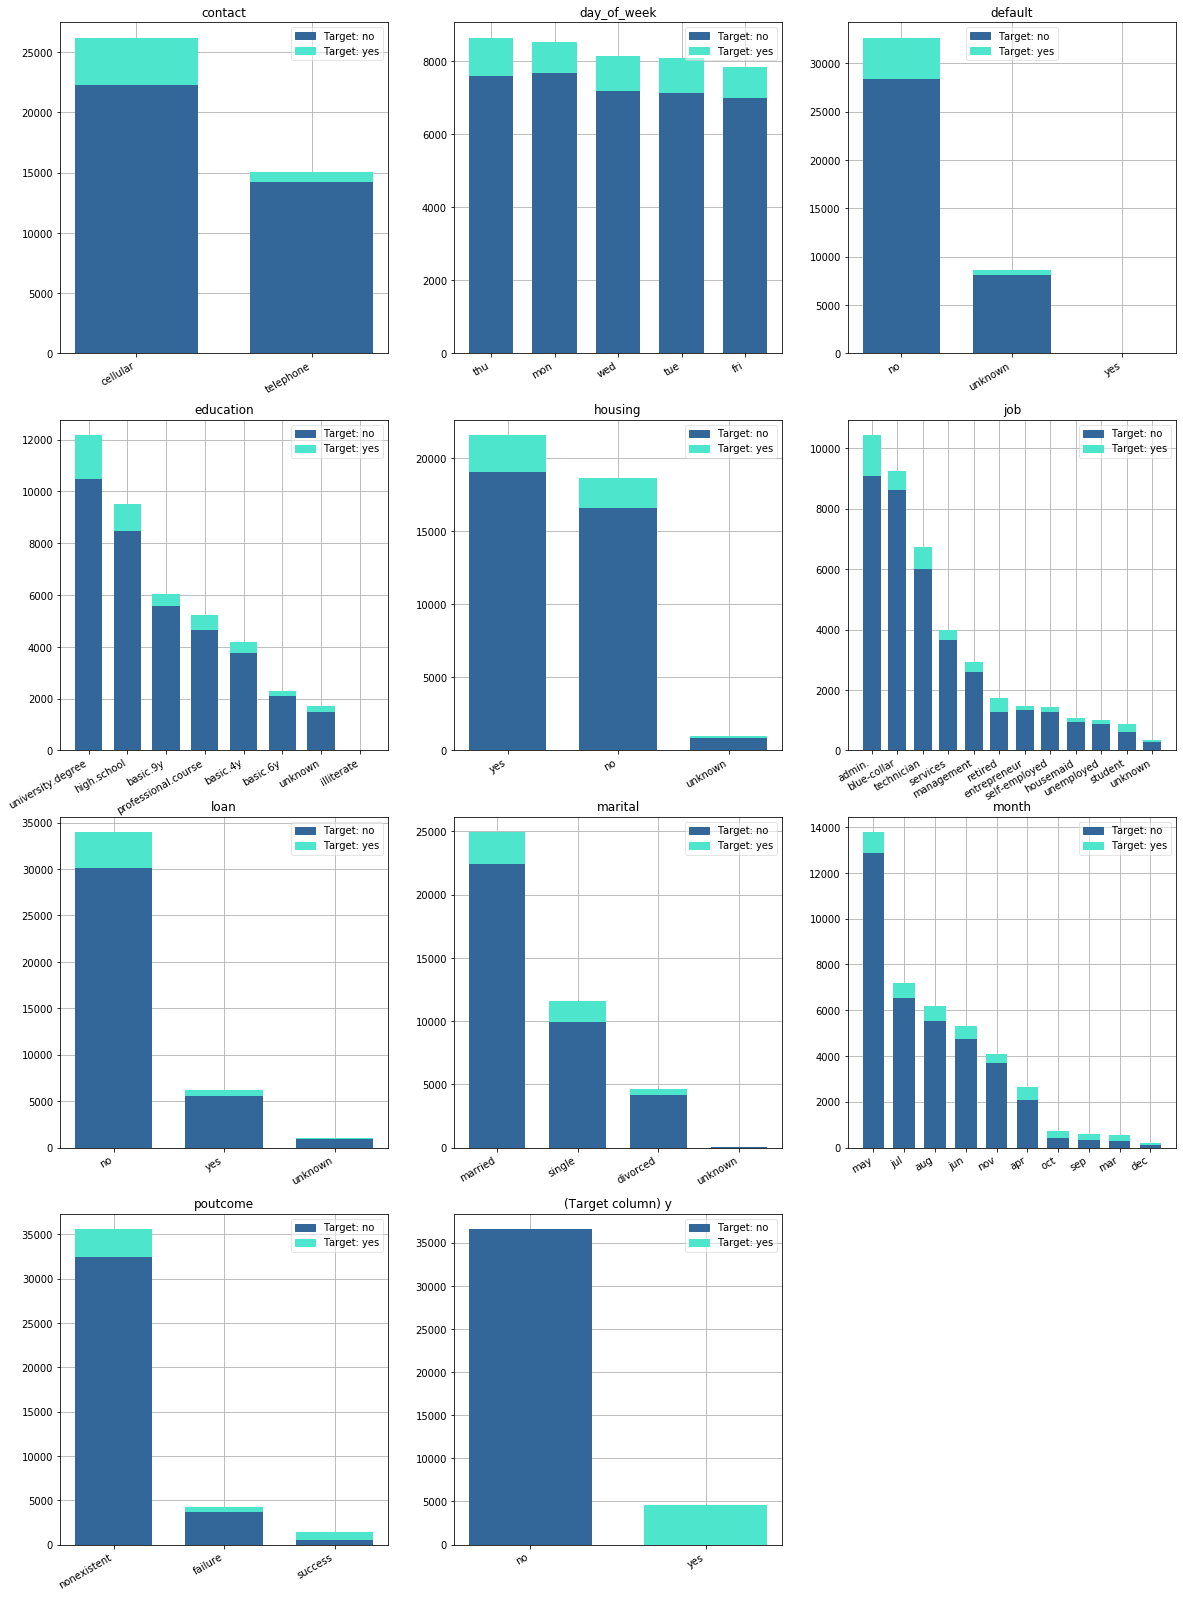

In [7]:
%matplotlib inline
import matplotlib.patches as mpatches

char_cols = data_quality[data_quality['Type']=="Char"]['Column Name'].tolist()
columns = 3
plot_nums = len(char_cols)
rows = math.ceil(plot_nums/columns)

fig, ax = plt.subplots(rows,columns, figsize = (20, rows*7), squeeze=False)
#ax is a 2D axis, so flatten this to use below:
ax = ax.flatten()
for i,col in enumerate(char_cols):
    if col != target_class:
        temp1      = yes[col].value_counts().sort_index().to_frame(name='Yes').reset_index()
        temp2      = no[col].value_counts().sort_index().to_frame(name='No').reset_index()
        chart_data = pd.merge(temp1, temp2, left_on = 'index', right_on = 'index', how = 'outer')
        chart_data.fillna(0)
        chart_data['Total'] = chart_data['Yes'] + chart_data['No'] 
        chart_data = chart_data.set_index('Total').sort_index(ascending=False)
        x  = chart_data['index'].tolist()
        y1 = chart_data['No'].tolist()
        y2 = chart_data['Yes'].tolist()
        ax[i].bar(x, y1,            width=0.7, align='center', color = colour_class0, zorder=3)
        ax[i].bar(x, y2, bottom=y1, width=0.7, align='center', color = colour_class1, zorder=3)
        ax[i].title.set_text(col)
    else:
        ax[i].title.set_text("(Target column) " + col)
        temp = df[col].value_counts()
        ax[i].bar(temp.index.tolist(),
                  temp.tolist()    ,width=0.7, align='center', color=[colour_class0,colour_class1], zorder=3)
        
    class0_patch = mpatches.Patch(color = colour_class0, label = 'Target: no')
    class1_patch = mpatches.Patch(color = colour_class1, label = 'Target: yes')
    ax[i].grid(zorder=0)
    ax[i].legend(handles=[class0_patch,class1_patch],fancybox=True, framealpha=0.5)

    #ax[i].legend()
    plt.setp(ax[i].get_xticklabels(), rotation=30, horizontalalignment='right')

#if number of plots are fewer than number of items in ax[] array, 
#then turn off axes in remainder of items in ax[] array.
for i in range(plot_nums,rows*columns):
    ax[i].set_axis_off()
    
title(text='FREQUENCY PLOTS for categorical columns')
plt.show()

**Comments**

 * It is clear that there is an imbalanced target variable with rare positive classes. I will proceed without addressing this in the first iteration of the model assesssments. Pending low performance metrics in run 1, I may address this potential issue in the second run.


------------------------------------------------------------------------------------------
                         OVERLAY HISTORGRAMS FOR NUMERIC COLUMNS                          
------------------------------------------------------------------------------------------



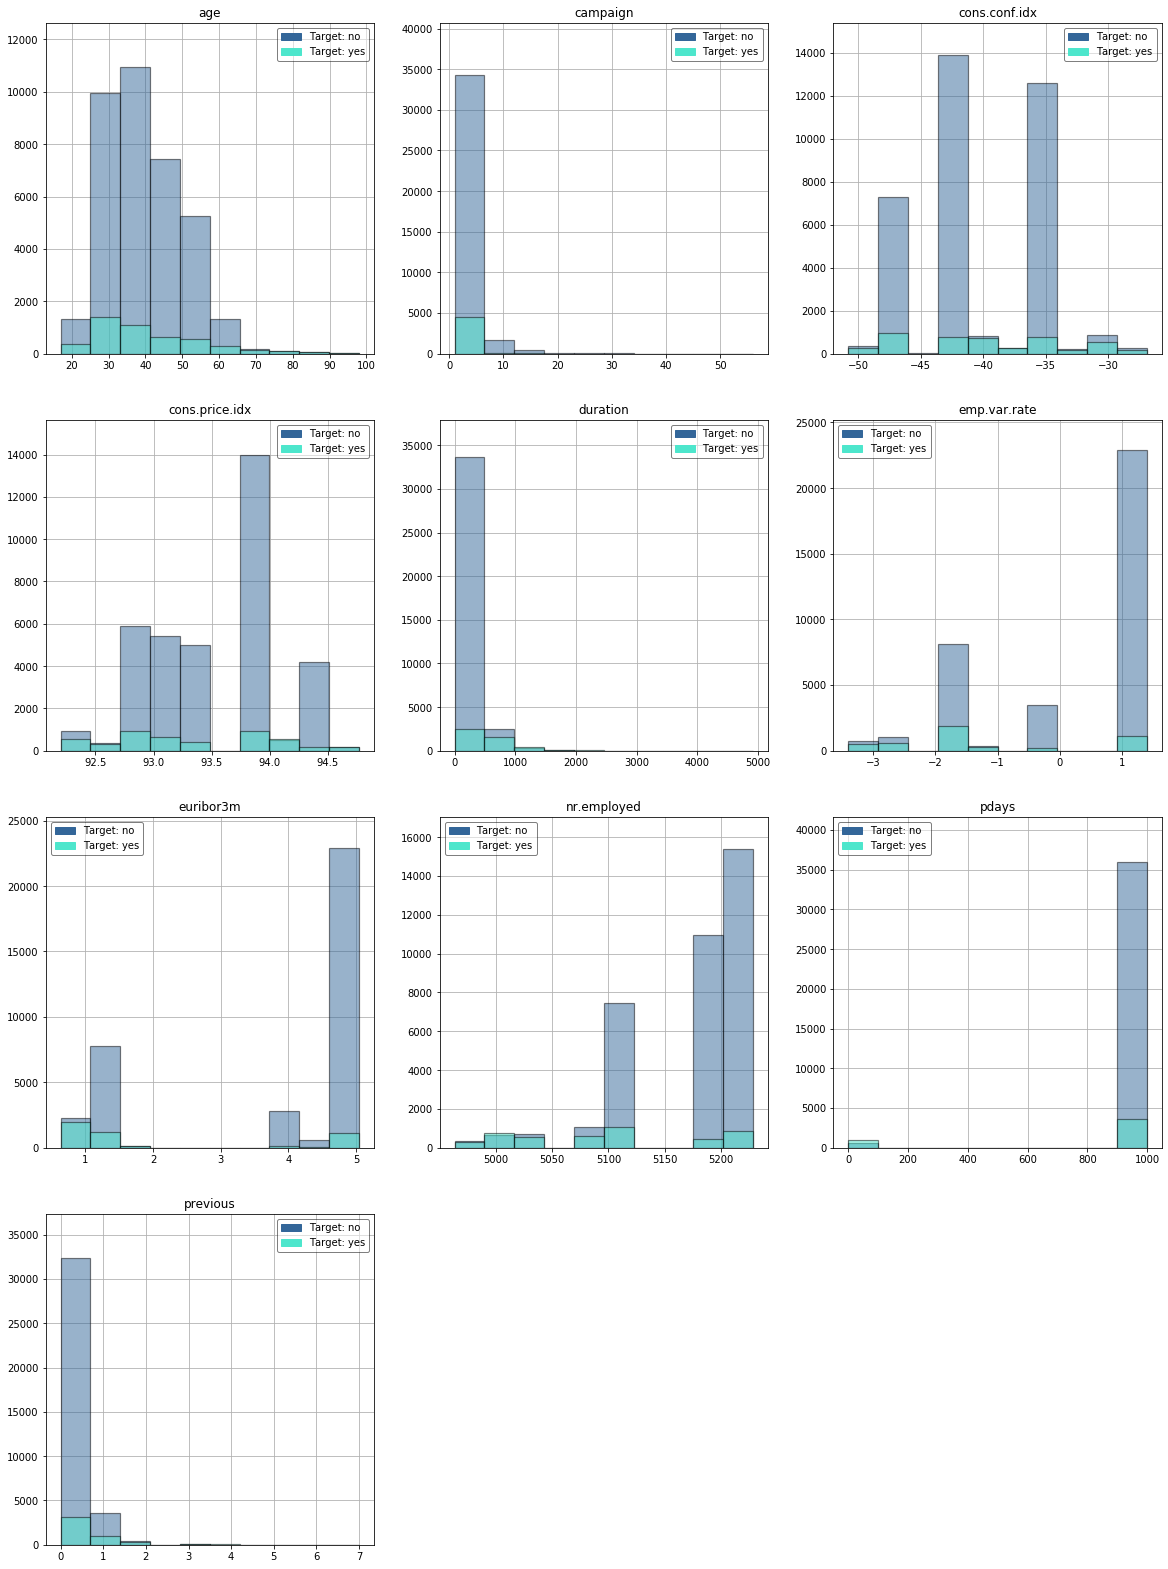

In [8]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

alpha = 0.5
num_cols = data_quality[data_quality['Type']!="Char"]['Column Name'].sort_values().tolist()
columns = 3
plot_nums = len(num_cols)
rows = math.ceil(plot_nums/columns)

fig, ax = plt.subplots(rows,columns, figsize = (20, rows*7), squeeze=False)
#ax is a 2D axis, so flatten this to use below:
ax = ax.flatten()
for i,col in enumerate(num_cols):
    ax[i].grid(zorder=0)
    x1 = no[col].to_numpy()
    x2 = yes[col].to_numpy()
    _, bins, _ = ax[i].hist(df[col], color='white',alpha = 0, zorder=3) #invisible Total bars - required to automatically generate consistent bins per graph
    ax[i].hist(x1, bins, alpha = alpha, label='no', edgecolor='black', linewidth=1.2, color = colour_class0, zorder=3)
    ax[i].hist(x2, bins, alpha = alpha, label='yes', edgecolor='black', linewidth=1.2, color = colour_class1, zorder=3)
    class0_patch = mpatches.Patch(color = colour_class0, label = 'Target: no')
    class1_patch = mpatches.Patch(color = colour_class1, label = 'Target: yes')
    ax[i].legend(handles=[class0_patch,class1_patch],fancybox=True, framealpha=0.5, edgecolor='black')
    #ax[i].legend(loc='upper right')
    ax[i].title.set_text(col)
title(text='OVERLAY HISTORGRAMs for numeric columns')

#if number of plots are fewer than number of items in ax[] array, 
#then turn off axes in remainder of items in ax[] array.
for i in range(plot_nums,rows*columns):
    ax[i].set_axis_off()

plt.show()

#If the above doesn't work...
#%matplotlib inline

#title(text='FREQUENCY PLOTS for ALL numerical columns')
#plt = df.hist(figsize = (20, 20), color = (0.1, 0.2, 0.4, 0.3))

#title(text='FREQUENCY PLOTS for numerical columns: Target - "No" ')
#plt = no.hist(figsize = (20, 20), color = (colour_class0), label='Target: no')

#title(text='FREQUENCY PLOTS for numerical columns: Target - "Yes')
#plt = yes.hist(figsize = (20, 20), color = colour_class1, label='Target: yes')

**Comments**

 * There appears to be a good spread of target classes between most variables (i.e. there are no unintentional perfect predictors, and low risk of quasi-complete separation)
 * There does not appear to be any distribtion which is showing significantly large skew. I will proceed for the moment, without further remedy of any percieved non-linearity between features or between feature and target.

### *STEP 2C: Correlation Plots*

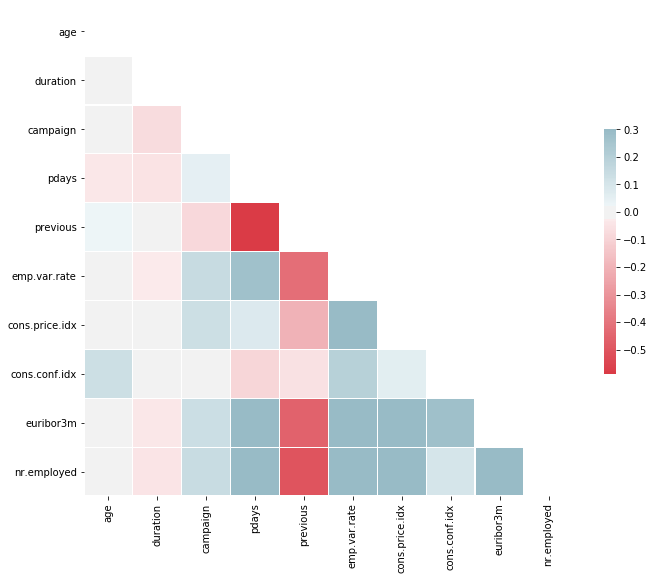

In [9]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(10, 220, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

**Comments**

 * There appears to be strong negative correlation with 'previous' and 'pdays', 'emp.var.rate', 'cons.price.idx', 'euribor3m', 'nr.employed.
 * I will proceed for the moment, without further remedy to this potential redundancy. This may need to be revised in Run 2, where the 'previous' column is removed.

### *STEP 2D: Ad-Hoc Exploration*

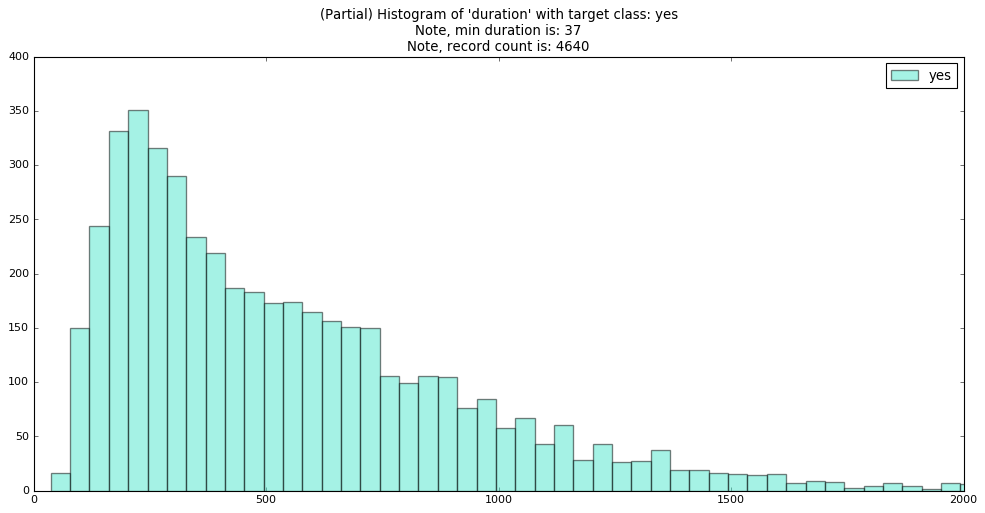

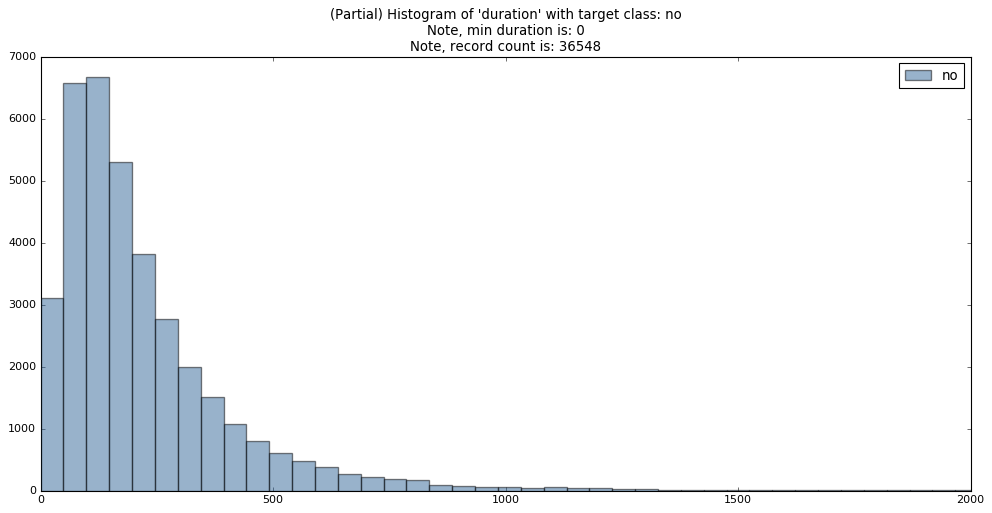

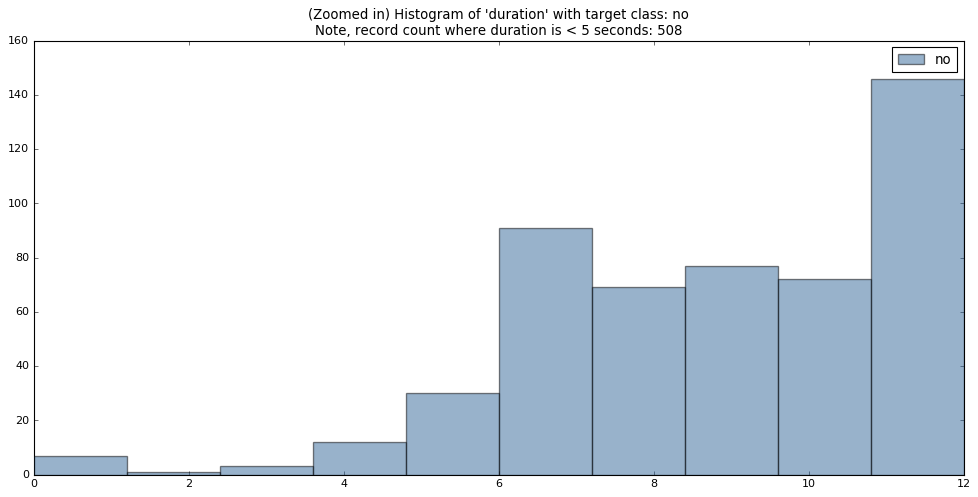

In [10]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline

col = 'duration'

plt.figure(num=None, figsize=(15, 7), dpi=80, facecolor='w', edgecolor='k')
x2 = yes[col].sort_values().to_numpy()
plt.xlim(0,2000)
plt.hist(x2, 100, alpha = alpha, label='yes', edgecolor='black', linewidth=1.2, color = colour_class1, zorder=3)
plt.legend()
plt.title("(Partial) Histogram of 'duration' with target class: yes\nNote, min duration is: " + str(min(x2)) + "\nNote, record count is: " + str(len(x2)))
plt.show()

plt.figure(num=None, figsize=(15, 7), dpi=80, facecolor='w', edgecolor='k')
x1 = no[col].to_numpy()
plt.xlim(0,2000)
plt.hist(x1, 100, alpha = alpha, label='no', edgecolor='black', linewidth=1.2, color = colour_class0, zorder=3)
plt.legend()
plt.title("(Partial) Histogram of 'duration' with target class: no\nNote, min duration is: " + str(min(x1)) + "\nNote, record count is: " + str(len(x1)))
plt.show()

lim=5
plt.figure(num=None, figsize=(15, 7), dpi=80, facecolor='w', edgecolor='k')
x3 = no[no[col]<=lim+7][col].to_numpy()
plt.xlim(0,lim+7)
plt.hist(x3, alpha = alpha, label='no', edgecolor='black', linewidth=1.2, color = colour_class0, zorder=3)
plt.legend()
plt.title("(Zoomed in) Histogram of 'duration' with target class: no\nNote, record count where duration is < "+str(lim)+" seconds: " + str(len(x3)))
plt.show()


**Comments**

 * It is already clear that a duration of 0 means that customers were not contacted during a prior campaign and therefore cannot be used for predictive model training.
 * However, investigating whether a customer was only part of one prior campaign but had a contact time of less than or equal to 5 seconds - makes sense that the call was disconnected and therefore it can be assumed that no meaningful contact shouuld be considered. These records should thus be deleted, alongside zero duration records. 

### *STEP 2E: Transformations*

In [11]:
#Drop "Duration" column: this was the last contact duration, in seconds (numeric). 
#Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). 
#Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. 
#Thus, this input should be discarded if the intention is to have a realistic predictive model.

#Remove 4 records which were not part of any previous campaigns
dim_counter = df.shape[0] #initialise row counter
df = df[df.duration != 0]
print("1. Customers not part of prev campaigns:              ",dim_counter - df.shape[0],"records deleted")
dim_counter = df.shape[0] #reset row counter

#Remove 32 records which were not called up properly on previous campaigns
df = df[((df.duration <= 5) & (df.campaign <= 1))==False]
print("2. Customers not contacted properly in prev campaigns:",dim_counter - df.shape[0],"records deleted")
dim_counter = df.shape[1] #initialise coloumn counter

#Remove 1 column
df.drop(columns=['duration'], inplace=True)
print("3. Columns not relevant for predictive modelling:     ",dim_counter - df.shape[1],"column deleted")
print("\nNew dimensions of data:\nRow count:   ",f"{df.shape[0]:,}","\nColumn count:",f"{df.shape[1]:,}")

1. Customers not part of prev campaigns:               4 records deleted
2. Customers not contacted properly in prev campaigns: 32 records deleted
3. Columns not relevant for predictive modelling:      1 column deleted

New dimensions of data:
Row count:    41,152 
Column count: 20


### *STEP 2F: Data Quality Conclusions*

#### Imputation:
All columns now appear to be complete and containt reasonable values. There is no need (at this stage) for further imputation of missing values or unreasonable values.

#### Clustering and collapsing levels of categorical variables:
All categorical variables contain fewer than 20 unique values per column, so there is no need to invest time (or lose information) in collapsing levels at this stage.

#### Variable Screening:
There are only 19 features and 1 binary target variable, so it may not be worth investing time in screening for irrelevant variables. The same is true (at this stage), for binning non-linear associated variables. 
Since our goal is to test a series of models, some of which are flexible multivariate function estimator models (which can handle non-linearities between inputs and a target), it will become clear if will need to be revised in the model rerun section.

***
# PART 3 - Model Development (Run 1)
***

## 3.1) STEP 3: Feature Engineering

### *STEP 3A: One-Hot Encoding*

In [12]:
#Set target and features
target = 'y'
features = df.columns.tolist()
features.remove(target)
X = df[features]
y = df[[target]]
print(features)

['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


In [13]:
#One Hot encoding
dict_month_map = {'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}
dict_week_map = {'mon':1,'tue':2,'wed':3,'thu':4,'fri':5,'sat':6,'sun':7}
dict_target_map = {'yes':1,'no':0}

#Perform manual one-hot encoding for the below variables
#This ensures that they are encoded the way one would expect
#Note, Python will issue a warning as we are changing the type from character to numeric
X['month'].replace(dict_month_map, inplace=True)
X['day_of_week'].replace(dict_week_map, inplace=True)
y['y'].replace(dict_target_map, inplace=True)

#Extract list of character variables (this will exclude the above three)
char_list=[]
for col in X.columns:
    if  np.issubdtype(X[col].dtype, np.datetime64) or  np.issubdtype(X[col].dtype, np.number): pass
    else: char_list.append(col.upper())
        
#Perform one-hot encoding on remaining variables:
#New variables have previous column name prefixed to new name
X_onehot_run1 = pd.get_dummies(X, prefix=char_list, prefix_sep="_")
X_onehot_run1.columns

C:\Users\harsh\anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


Index(['age', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'JOB_admin.', 'JOB_blue-collar', 'JOB_entrepreneur',
       'JOB_housemaid', 'JOB_management', 'JOB_retired', 'JOB_self-employed',
       'JOB_services', 'JOB_student', 'JOB_technician', 'JOB_unemployed',
       'JOB_unknown', 'MARITAL_divorced', 'MARITAL_married', 'MARITAL_single',
       'MARITAL_unknown', 'EDUCATION_basic.4y', 'EDUCATION_basic.6y',
       'EDUCATION_basic.9y', 'EDUCATION_high.school', 'EDUCATION_illiterate',
       'EDUCATION_professional.course', 'EDUCATION_university.degree',
       'EDUCATION_unknown', 'DEFAULT_no', 'DEFAULT_unknown', 'DEFAULT_yes',
       'HOUSING_no', 'HOUSING_unknown', 'HOUSING_yes', 'LOAN_no',
       'LOAN_unknown', 'LOAN_yes', 'CONTACT_cellular', 'CONTACT_telephone',
       'POUTCOME_failure', 'POUTCOME_nonexistent', 'POUTCOME_success'],
      dtype='object')

### *STEP 3B: Split Data Set into Training and Validation Data*

In [14]:
# 80% training and 20% test
random_state=42
X_train, X_test, y_train, y_test = train_test_split(X_onehot_run1, y, test_size=0.2, random_state=random_state)

# Some model functions such as SVM models and Logistic Regression 
# only accept 1D arrays for their single classification target, so convert Y to an array
y_train_array = y_train.values.ravel()
y_test_array = y_test.values.ravel()

## 3.2) STEP 4: Model Training

### *Set Up Modelling and Evaluation Scoring Functions*

In [15]:
#Initialise Results Table
Results_Table = pd.DataFrame(columns=['Model Name','Positive Predicted Value','Accuracy','AUC / c-statistic','F1 Score','Sensitivity','Train Time','Predict Time'])
y_pred = []
y_pred_perc = []
Train_Time = Predict_Time = 0
def Generate_Results_Stats(title_txt, y_test, y_pred, y_pred_perc, Train_Time, Predict_Time):

    import seaborn as sns
    import matplotlib.pyplot as plt     
    from matplotlib.pyplot import figure
    from sklearn.metrics import confusion_matrix
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.metrics import roc_curve, roc_auc_score
    import scikitplot as skplt

    #Set plot parameters
    plt.rcParams.update({'font.size': 12})
    figure(num=None, figsize=(5, 4), dpi=80, facecolor='w', edgecolor='k')
    
    title(text='RESULTS SUMMARY FOR '+ title_txt + ' MODEL')

    ##################################
    # STEP 1. Build Confusion Matrix #
    ##################################

    #Build Confusion Matrix
    conf_matrix = confusion_matrix(y_test, pd.DataFrame(y_pred, columns=['y']))
    conf_matrix

    #invert false positives and false negatives to force FP/FN into the red zone of heatmap
    inverted_conf_matrix       = conf_matrix.copy()
    inverted_conf_matrix[0][1] = -1 * inverted_conf_matrix[0][1]
    inverted_conf_matrix[1][0] = -1 * inverted_conf_matrix[1][0]
    inverted_conf_matrix

    #Create labels of TP, FP, FN, TN:
    label_matrix = []
    label_matrix.append('True Negatives:'  + '\n' + str(f"{conf_matrix[0][0]:,}"))
    label_matrix.append('False Positives:' + '\n' + str(f"{conf_matrix[0][1]:,}"))
    label_matrix.append('False Negatives:' + '\n' + str(f"{conf_matrix[1][0]:,}"))
    label_matrix.append('True Positives:'  + '\n' + str(f"{conf_matrix[1][1]:,}"))
    label_matrix = np.asarray(label_matrix).reshape(2,2)

    #Create colour map
    #rdgn = sns.diverging_palette(h_neg=10, h_pos=130, s=99, l=55, sep=3, as_cmap=True)

    ax = plt.subplot()
    #sns.heatmap(confusion_matrix, annot=True, ax = ax,fmt='g'); #annot=True to annotate cells
    sns.heatmap(inverted_conf_matrix,
                ax = ax,
                cmap="PiYG",
                center=0.00,
                annot=label_matrix,
                fmt="",
                linewidths=.5,
                annot_kws={'size':12},
                cbar=False)

    # labels, title and ticks
    ax.set_xlabel('Predicted Values\n');ax.set_ylabel('Actual Values\n'); 
    ax.set_title('\nConfusion Matrix\n', size=20); 
    ax.xaxis.set_ticklabels(['false', 'true']); ax.yaxis.set_ticklabels(['false', 'true']);
     
    #Print values
    TN, FP, FN, TP = conf_matrix.ravel()
    
    print("True Postives   = ", f"{TP:,}"," (",f"{TP/y_pred.shape[0]:.1%}",")",sep="")
    print("True Negatives  = ", f"{TN:,}"," (",f"{TN/y_pred.shape[0]:.1%}",")",sep="")
    print("False Postives  = ", f"{FP:,}"," (",f"{FP/y_pred.shape[0]:.1%}",")",sep="")
    print("False Negatives = ", f"{FN:,}"," (",f"{FN/y_pred.shape[0]:.1%}",")",sep="")

    plt.show()
    
    ###########################
    # STEP 2. Build ROC Curve #
    ###########################

    #ROC Curve + AUC Metric
    skplt.metrics.plot_roc(y_test, y_pred_perc, title='\nROC Curve\n', 
                           plot_micro=False, plot_macro=False, 
                           ax=None, figsize=None, title_fontsize=20, text_fontsize=12)
                           #, cmap='Oranges'
    plt.grid()
    plt.xlim(0, 1)
    plt.ylim(0, 1) 
    plt.show()

    #############################
    # STEP 3. Build Gains Chart #
    #############################

    skplt.metrics.plot_cumulative_gain(y_test, y_pred_perc)
    plt.title('\nCumulative Gains\n', size=20)
    plt.xlabel('\n% of Customers Contacted', size=12)
    plt.ylabel('Gain\n', size=12)
    plt.legend(loc='lower right')
    plt.show()

    ############################
    # STEP 4. Build Lift Chart #
    ############################

    skplt.metrics.plot_lift_curve(y_test, y_pred_perc)
    plt.title('\nLift\n', size=20)
    plt.xlabel('\n% of Customers Contacted', size=12)
    plt.ylabel('Lift\n', size=12)
    plt.legend(loc='lower right')
    plt.show()

    ########################################
    # STEP 5. Add Metrics to Results Table #
    ########################################
    
    #Some Common Metrics
    score_Accuracy     = (TP + TN) / (TP + FP + FN + TN)   
    score_Sensitivity  = TP / (TP + FN) 
    score_Specificity  = TN / (TN + FP) 
    score_PosPredValue = TP / (TP + FP) 
    score_NegPredValue = TN / (TN + FN) 
    score_ErrorRate    = (FP + FN) / (TP + FP + FN + TN)   
    
    new_row =   {'Model Name'                  :title_txt,
                 'Positive Predicted Value'    :score_PosPredValue,
                 'Accuracy'                    :score_acc,
                 'AUC / c-statistic'           :score_AUC,
                 'F1 Score'                    :score_F1,
                 'Sensitivity'                 :score_Sensitivity,
                 'Train Time'                  :Train_Time,
                 'Predict Time'                :Predict_Time
                }
    
    #append row to the dataframe
    global Results_Table
    Results_Table = Results_Table.append(new_row, ignore_index=True)
    
    #Output x and y parameters for ROC Curves to be plotted later
    fpr , tpr, thresholds = roc_curve(y_test, y_pred_perc[:,1])
       
    return fpr, tpr

In [16]:
#Since I will be scoring multiple models and generating the same fit statistics, use a function to generate these
def pred_score(fitted_model, y_test=y_test, X_test=X_test):
    
    start = time.time()
    
    #Predict the response for test dataset
    y_pred = fitted_model.predict(X_test)
    y_pred_perc = fitted_model.predict_proba(X_test)

    end = time.time()
    
    #Generate metrics
    score_acc    = metrics.accuracy_score(y_test, y_pred)
    score_F1     = metrics.f1_score(y_test, y_pred)
    score_AUC    = metrics.roc_auc_score(y_test, y_pred_perc[:,1])
    Predict_Time = timedelta(seconds=(end - start))
    
    print("Accuracy:",score_acc)
    
    return y_pred, y_pred_perc, score_acc, score_F1, score_AUC, Predict_Time


### *STEP 4A (i): Decision Tree Model (M1)*

In [17]:
# Create Decision Tree classifer object
M1_DecisionTree = DecisionTreeClassifier(random_state=random_state)

start = time.time()

# Train Decision Tree Classifer
R1M1 = M1_DecisionTree.fit(X_train,y_train)

end = time.time()
Train_Time = timedelta(seconds=(end - start))

# Score model and generate fit statistics
y_pred, y_pred_perc, score_acc, score_F1, score_AUC, Predict_Time = pred_score(fitted_model = R1M1)

Accuracy: 0.8455837686793828



------------------------------------------------------------------------------------------
                         RESULTS SUMMARY FOR DECISION TREE MODEL                          
------------------------------------------------------------------------------------------

True Postives   = 309 (3.8%)
True Negatives  = 6,651 (80.8%)
False Postives  = 655 (8.0%)
False Negatives = 616 (7.5%)


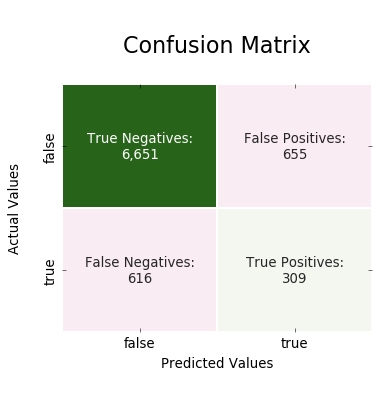

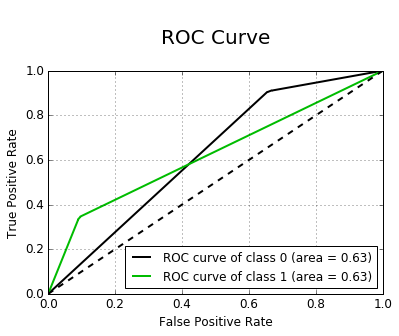

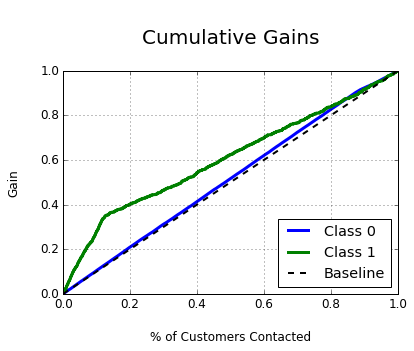

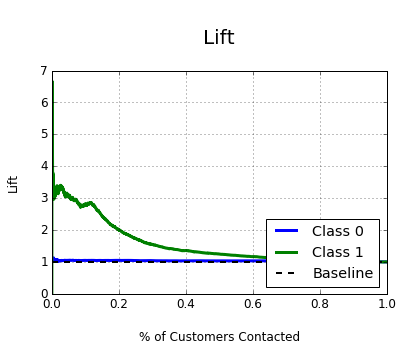

In [18]:
fpr1,tpr1 = Generate_Results_Stats(title_txt="Decision Tree", y_test=y_test, y_pred=y_pred, y_pred_perc=y_pred_perc, Train_Time=Train_Time, Predict_Time=Predict_Time)

Comments: Cumulative Gains chart shows that if we target the top 20% of customers with highest predicted probabilities (deciles 1 and 2) we capture 40% of positive responses

### *STEP 4A (ii): Optimizing the Decision Tree Model (M1.1)*
##### (Attribute Selection: Entropy and Max Depth of Tree)

In [19]:
# Create Decision Tree classifer object
M1_1_DecisionTreePruned = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=random_state)

start = time.time()

# Train Decision Tree Classifer
R1M2 = M1_1_DecisionTreePruned.fit(X_train,y_train)

end = time.time()
Train_Time = timedelta(seconds=(end - start))

# Score model and generate fit statistics
y_pred, y_pred_perc, score_acc, score_F1, score_AUC, Predict_Time  = pred_score(fitted_model = R1M2)

Accuracy: 0.8987972299842061



------------------------------------------------------------------------------------------
                RESULTS SUMMARY FOR DECISION TREE (PRUNED: DEPTH-3) MODEL                 
------------------------------------------------------------------------------------------

True Postives   = 157 (1.9%)
True Negatives  = 7,241 (88.0%)
False Postives  = 65 (0.8%)
False Negatives = 768 (9.3%)


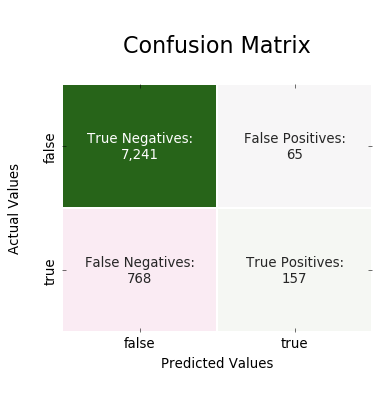

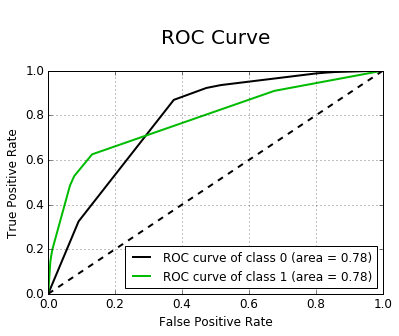

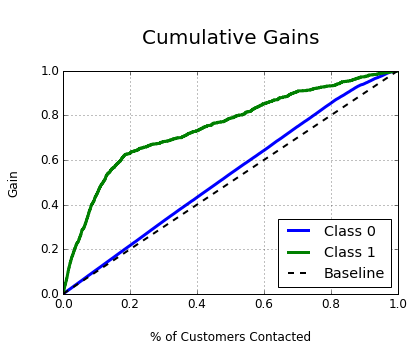

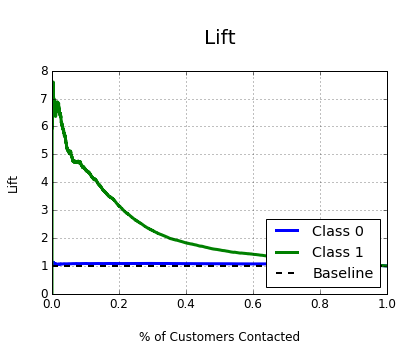

In [20]:
fpr2,tpr2 = Generate_Results_Stats(title_txt="Decision Tree (Pruned: Depth-3)", y_test=y_test, y_pred=y_pred, y_pred_perc=y_pred_perc, Train_Time=Train_Time, Predict_Time=Predict_Time)

### *STEP 4B: Logistic Regression Model (M2)*

In [21]:
from sklearn.linear_model import LogisticRegression

# Create Logistic Regression object
M2_LogisticRegression = LogisticRegression(C=0.01, solver='liblinear', random_state=random_state) #C is the regularization: lower is stronger reg


start = time.time()

# Train Logistic Regression Classifer
R1M3 = M2_LogisticRegression.fit(X_train,y_train_array) 
end = time.time()
Train_Time = timedelta(seconds=(end - start))

# Score model and generate fit statistics
y_pred, y_pred_perc, score_acc, score_F1, score_AUC, Predict_Time = pred_score(fitted_model = R1M3, y_test=y_test_array)


Accuracy: 0.8997691653505042



------------------------------------------------------------------------------------------
                      RESULTS SUMMARY FOR LOGISTIC REGRESSION MODEL                       
------------------------------------------------------------------------------------------

True Postives   = 176 (2.1%)
True Negatives  = 7,230 (87.8%)
False Postives  = 76 (0.9%)
False Negatives = 749 (9.1%)


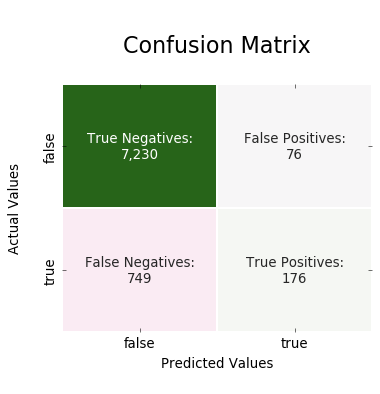

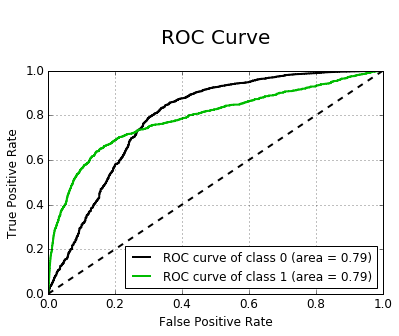

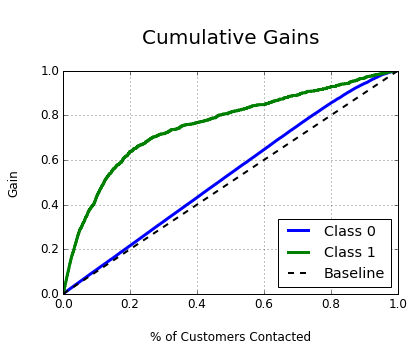

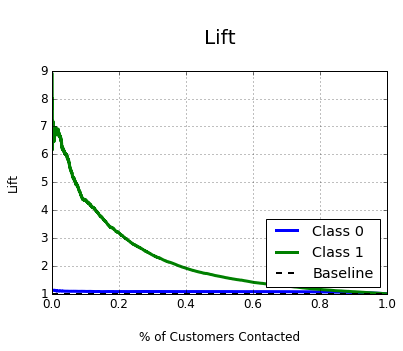

In [22]:
fpr3,tpr3 = Generate_Results_Stats(title_txt="Logistic Regression", y_test=y_test, y_pred=y_pred, y_pred_perc=y_pred_perc, Train_Time=Train_Time, Predict_Time=Predict_Time)

### *STEP 4C: SVC Model (M3)*

In [23]:
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV

# Create SVM object
M3_LinearSVC = CalibratedClassifierCV(base_estimator=LinearSVC(C = 1.0, dual = False,random_state=random_state), cv=5)

start = time.time()

# Train SVM Classifer
R1M4 = M3_LinearSVC.fit(X_train,y_train_array)

end = time.time()
Train_Time = timedelta(seconds=(end - start))

# Score model and generate fit statistics
y_pred, y_pred_perc, score_acc, score_F1, score_AUC, Predict_Time = pred_score(fitted_model = R1M4, y_test=y_test_array)


Accuracy: 0.8995261815089296



------------------------------------------------------------------------------------------
                           RESULTS SUMMARY FOR LINEAR SVC MODEL                           
------------------------------------------------------------------------------------------

True Postives   = 191 (2.3%)
True Negatives  = 7,213 (87.6%)
False Postives  = 93 (1.1%)
False Negatives = 734 (8.9%)


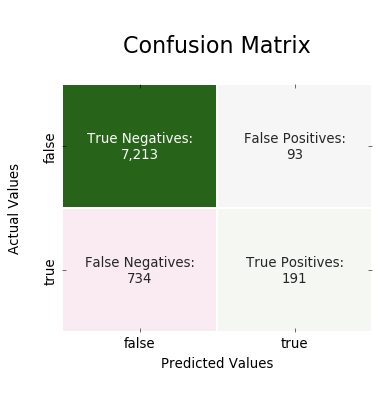

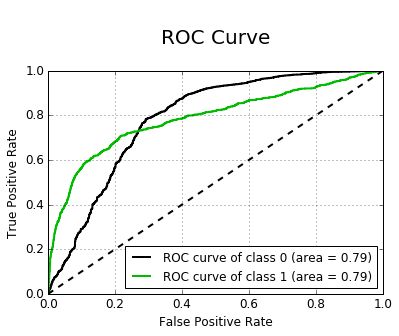

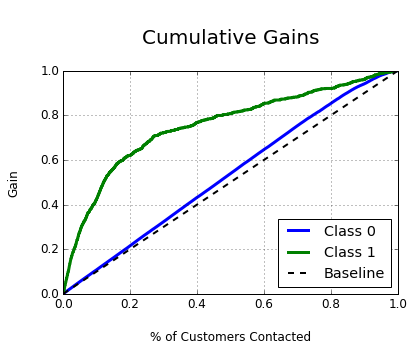

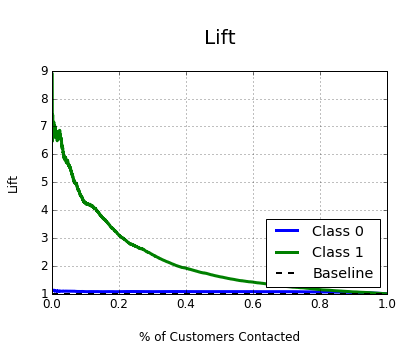

In [24]:
fpr4,tpr4 = Generate_Results_Stats(title_txt="Linear SVC", y_test=y_test, y_pred=y_pred, y_pred_perc=y_pred_perc, Train_Time=Train_Time, Predict_Time=Predict_Time)

### *STEP 4D: Deep Learning Model (Multilayer Perceptron Model: M4)*

In [25]:
IBM = True
if IBM:
    
    # Set uniform hidden layer nodes
    nodes = 200
    
    # Set up Deep Learning Model / Architecture
    #model = Sequential()
    R1M5 = Sequential()
    R1M5.add(Dense(nodes, input_shape=(X_train.shape[1],), activity_regularizer=regularizers.l2(0.01)))
    R1M5.add(Activation('relu'))
    R1M5.add(Dropout(rate=0.3))
    R1M5.add(Dense(nodes, activity_regularizer=regularizers.l2(0.01)))
    R1M5.add(Activation('relu'))
    R1M5.add(Dropout(rate=0.3))
    R1M5.add(Dense(1))
    R1M5.add(Activation('sigmoid'))
    R1M5.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Model Summary
    R1M5.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 200)               10000     
_________________________________________________________________
activation (Activation)      (None, 200)               0         
_________________________________________________________________
dropout (Dropout)            (None, 200)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               40200     
_________________________________________________________________
activation_1 (Activation)    (None, 200)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 2

In [26]:
if IBM:
    from keras.callbacks import History 
    history = History()

    batch_size = 32
    epochs = 100

    start = time.time()

    history = R1M5.fit(X_train, y_train,
                batch_size=batch_size,
                epochs=epochs,
                verbose=1,
                validation_data=(X_test, y_test))

    end = time.time()
    Train_Time = timedelta(seconds=(end - start))

    start = time.time()
    Y_pred_perc = R1M5.predict(X_test)
    Y_pred = (Y_pred_perc > 0.5).astype("int64")

    end = time.time()
    Predict_Time = timedelta(seconds=(end - start))

    score  = R1M5.evaluate(X_test, y_test, verbose=0)
    
    print('\n')
    print('Accuracy:',score[1])

Epoch 1/100
1029/1029 [==============================] - 1s 1ms/step - loss: 21898.7070 - accuracy: 0.8479 - val_loss: 386.4222 - val_accuracy: 0.8919
Epoch 2/100
1029/1029 [==============================] - 1s 1ms/step - loss: 273.5213 - accuracy: 0.8880 - val_loss: 130.3780 - val_accuracy: 0.8880
Epoch 3/100
1029/1029 [==============================] - 1s 1ms/step - loss: 79.7478 - accuracy: 0.8927 - val_loss: 30.0267 - val_accuracy: 0.8879
Epoch 4/100
1029/1029 [==============================] - 1s 1ms/step - loss: 16.2405 - accuracy: 0.8920 - val_loss: 5.7524 - val_accuracy: 0.8876
Epoch 5/100
1029/1029 [==============================] - 1s 1ms/step - loss: 3.8245 - accuracy: 0.8895 - val_loss: 2.3462 - val_accuracy: 0.8875
Epoch 6/100
1029/1029 [==============================] - 1s 1ms/step - loss: 1.9878 - accuracy: 0.8901 - val_loss: 1.5267 - val_accuracy: 0.8947
Epoch 7/100
1029/1029 [==============================] - 1s 1ms/step - loss: 1.4295 - accuracy: 0.8920 - val_loss: 1.

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


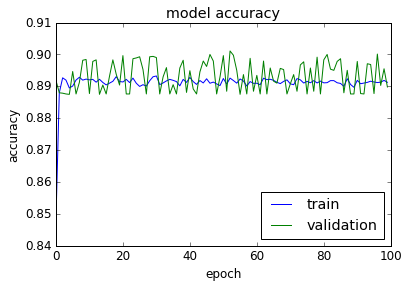

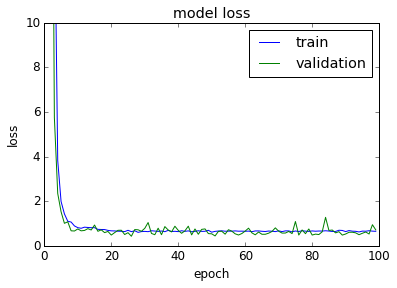

Accuracy: 0.8995261815089296


In [27]:
if IBM:
    import matplotlib.pyplot as plt
    print(history.history.keys())
    #  "Accuracy"
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='lower right')
    plt.show()
    # "Loss"
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.ylim(0,10)
    plt.legend(['train', 'validation'], loc='upper right')
    plt.show()
    
    score_acc   = metrics.accuracy_score(y_test, y_pred)
    score_F1    = metrics.f1_score(y_test, y_pred)
    score_AUC   = metrics.roc_auc_score(y_test, y_pred_perc[:,1])
    print("Accuracy:",score_acc)


------------------------------------------------------------------------------------------
                      RESULTS SUMMARY FOR DEEP LEARNING MODEL MODEL                       
------------------------------------------------------------------------------------------

True Postives   = 191 (2.3%)
True Negatives  = 7,213 (87.6%)
False Postives  = 93 (1.1%)
False Negatives = 734 (8.9%)


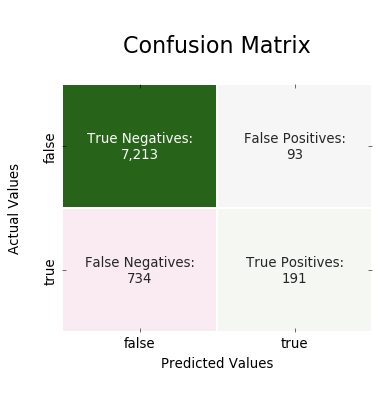

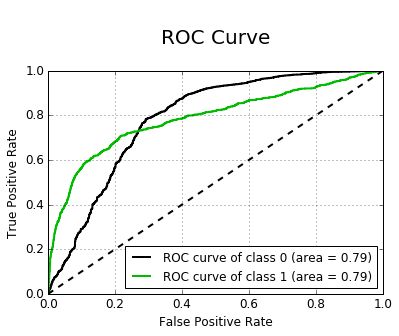

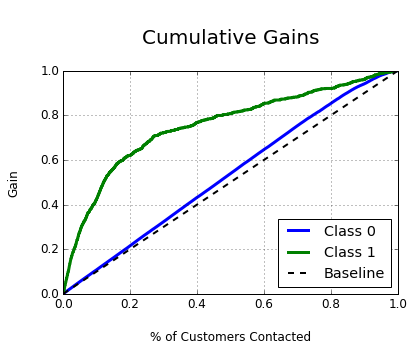

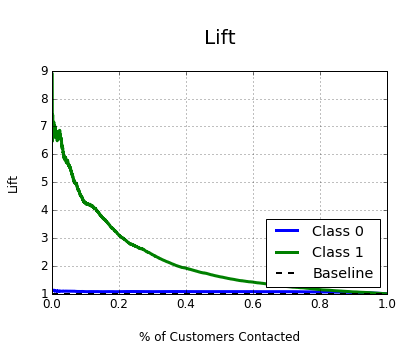

In [28]:
if IBM:
    fpr8,tpr8 = Generate_Results_Stats(title_txt="Deep Learning Model", y_test=y_test, y_pred=y_pred, y_pred_perc=y_pred_perc, Train_Time=Train_Time, Predict_Time=Predict_Time)

In [29]:
#Y_pred_df = pd.DataFrame(data=Y_pred, index=y_test.index, columns=['Predictions'])
#Pred_Check = pd.concat([X_test, y_test,Y_pred_df], axis=1)
#Pred_Check['Predictions2'] = Pred_Check['Predictions'].apply(lambda x: 1 if x >=0.5 else 0)
#Pred_Check['Predictions2'].sum()

In [30]:
# score_acc   = metrics.accuracy_score(y_test, y_pred)
#    score_F1    = metrics.f1_score(y_test, y_pred)
#    score_AUC   = metrics.roc_auc_score(y_test, y_pred_perc[:,1])
    
#Pred_Check['Predictions2'] = Pred_Check['Predictions'].apply(lambda x: 1 if x >=0.5 else 0)

# accuracy: (tp + tn) / (p + n)
#accuracy = accuracy_score(testy, yhat_classes)
#print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
#precision = precision_score(testy, yhat_classes)
#print('Precision: %f' % precision)
# recall: tp / (tp + fn)
#recall = recall_score(testy, yhat_classes)
#print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
#f1 = f1_score(testy, yhat_classes)
#print('F1 score: %f' % f1)

In [31]:
#some cleanup from the previous run
#!rm -f ker_*
#!rm -f my_best_model.tgz

### *STEP 4E (i): Ensemble Models: Random Forrest (M5.1)*

In [32]:
from sklearn.ensemble import RandomForestClassifier

# Create Random Forrest object with 100 trees
M5_RandomForrest = RandomForestClassifier(n_estimators=100, bootstrap = True, max_features = 'sqrt', random_state=random_state)

start = time.time()

# Train Random Forrest Classifer
R1M6 = M5_RandomForrest.fit(X_train, y_train_array)

end = time.time()
Train_Time = timedelta(seconds=(end - start))

# Score model and generate fit statistics
y_pred, y_pred_perc, score_acc, score_F1, score_AUC, Predict_Time = pred_score(fitted_model = R1M6, y_test=y_test_array)

Accuracy: 0.8974608188555461



------------------------------------------------------------------------------------------
                         RESULTS SUMMARY FOR RANDOM FORREST MODEL                         
------------------------------------------------------------------------------------------

True Postives   = 268 (3.3%)
True Negatives  = 7,119 (86.5%)
False Postives  = 187 (2.3%)
False Negatives = 657 (8.0%)


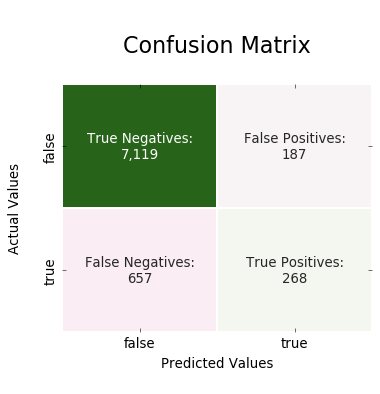

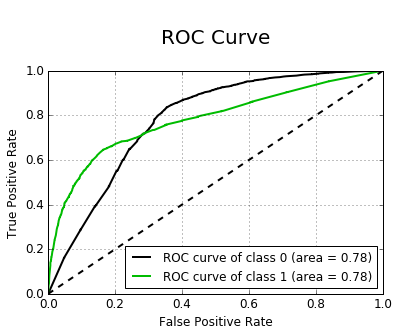

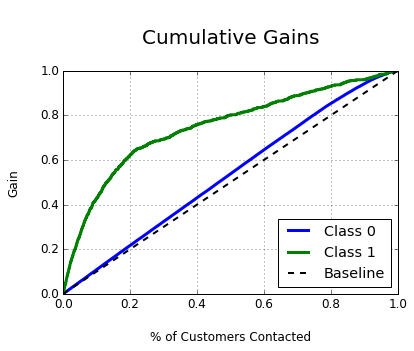

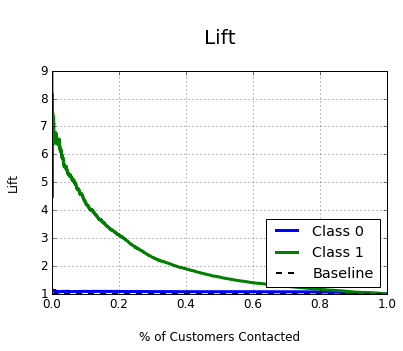

In [33]:
fpr5,tpr5 = Generate_Results_Stats(title_txt="Random Forrest", y_test=y_test, y_pred=y_pred, y_pred_perc=y_pred_perc, Train_Time=Train_Time, Predict_Time=Predict_Time)

### *STEP 4E (ii): Ensemble Models: Voting (M5.2)*

In [34]:
# Voting Ensemble for Classification
from sklearn.ensemble import VotingClassifier

# Create Voting Ensemble object - using previously definited model objects
M5_Ensemble_1 = VotingClassifier(estimators=[('dt_1',  M1_DecisionTree), 
                                             ('dt_2',  M1_1_DecisionTreePruned), 
                                             ('lgr',   M2_LogisticRegression), 
                                             ('svc',   M3_LinearSVC)], voting='soft')

start = time.time()

# Train Voting Ensemble Classifer
R1M7 = M5_Ensemble_1.fit(X_train,y_train_array)

end = time.time()
Train_Time = timedelta(seconds=(end - start))

# Score model and generate fit statistics
y_pred, y_pred_perc, score_acc, score_F1, score_AUC, Predict_Time = pred_score(fitted_model = R1M7, y_test=y_test_array)


Accuracy: 0.9011055764791641



------------------------------------------------------------------------------------------
                        RESULTS SUMMARY FOR VOTING ENSEMBLE MODEL                         
------------------------------------------------------------------------------------------

True Postives   = 219 (2.7%)
True Negatives  = 7,198 (87.4%)
False Postives  = 108 (1.3%)
False Negatives = 706 (8.6%)


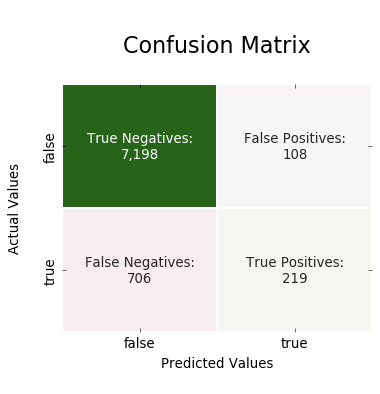

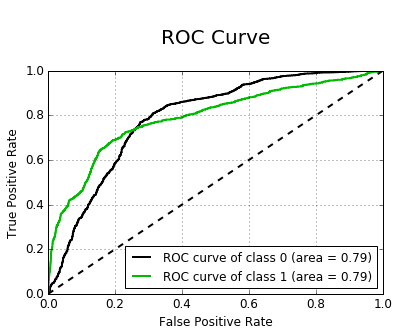

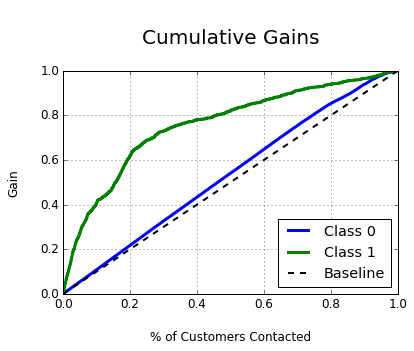

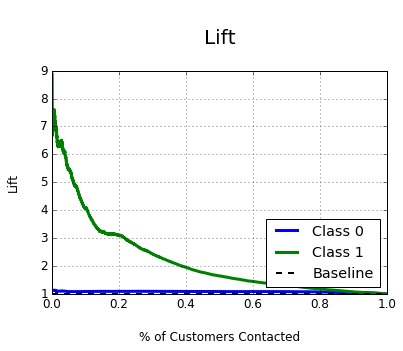

In [35]:
fpr6,tpr6 = Generate_Results_Stats(title_txt="Voting Ensemble", y_test=y_test, y_pred=y_pred, y_pred_perc=y_pred_perc, Train_Time=Train_Time, Predict_Time=Predict_Time)

### *STEP 4E (iii): Ensemble Models: Voting (No Decision Tree) (M5.3)*

In [36]:
# Voting Ensemble for Classification
from sklearn.ensemble import VotingClassifier

# Create Voting Ensemble object - using previously definited model objects
M5_Ensemble_2 = VotingClassifier(estimators=[('dt_2',  M1_1_DecisionTreePruned), 
                                             ('lgr',   M2_LogisticRegression), 
                                             ('svc',   M3_LinearSVC)], voting='soft')

start = time.time()

# Train Voting Ensemble Classifer
R1M8 = M5_Ensemble_2.fit(X_train,y_train_array)

end = time.time()
Train_Time = timedelta(seconds=(end - start))

# Score model and generate fit statistics
y_pred, y_pred_perc, score_acc, score_F1, score_AUC, Predict_Time = pred_score(fitted_model = R1M8, y_test=y_test_array)

Accuracy: 0.900133641112866



------------------------------------------------------------------------------------------
                       RESULTS SUMMARY FOR VOTING ENSEMBLE 2 MODEL                        
------------------------------------------------------------------------------------------

True Postives   = 172 (2.1%)
True Negatives  = 7,237 (87.9%)
False Postives  = 69 (0.8%)
False Negatives = 753 (9.1%)


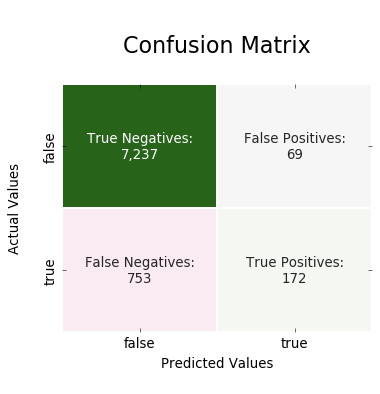

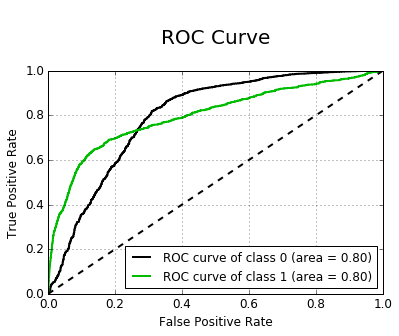

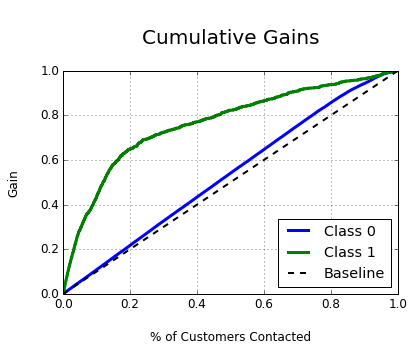

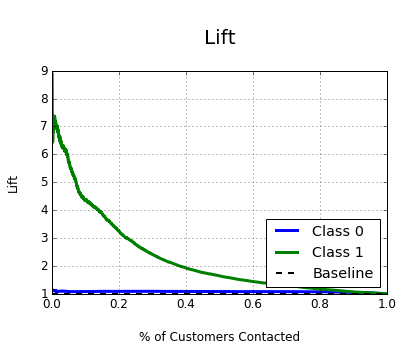

In [37]:
fpr7,tpr7 = Generate_Results_Stats(title_txt="Voting Ensemble 2", y_test=y_test, y_pred=y_pred, y_pred_perc=y_pred_perc, Train_Time=Train_Time, Predict_Time=Predict_Time)

## 3.3) STEP 5: Model Evaluation & Comparison

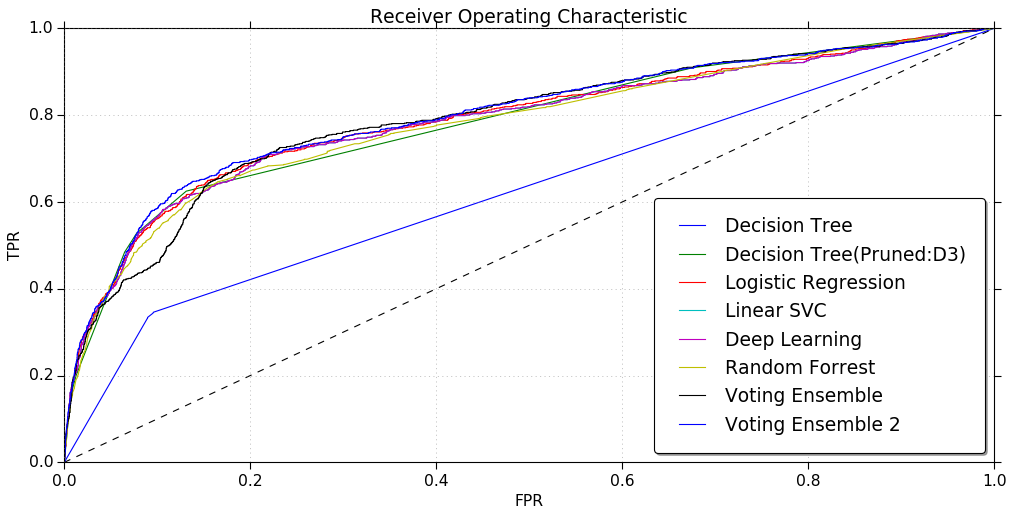

In [38]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline

plt.figure(num=None, figsize=(15, 7), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 14})
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr1, tpr1, label= "Decision Tree")
plt.plot(fpr2, tpr2, label= "Decision Tree(Pruned:D3)")
plt.plot(fpr3, tpr3, label= "Logistic Regression")
plt.plot(fpr4, tpr4, label= "Linear SVC")
#If Deep Learning model has not been run (ie if running locally) then skip:
try:
    fpr8
except NameError:
    pass
else:
    plt.plot(fpr8, tpr8, label= "Deep Learning")
plt.plot(fpr5, tpr5, label= "Random Forrest")
plt.plot(fpr6, tpr6, label= "Voting Ensemble")
plt.plot(fpr7, tpr7, label= "Voting Ensemble 2")
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('Receiver Operating Characteristic')
plt.grid()
plt.xlim(0, 1)
plt.ylim(0, 1) 
plt.legend(loc='lower right', fancybox=True, framealpha=1, shadow=True, borderpad=1)
plt.tick_params(direction='out', length=6, width=1, colors='black', grid_color='grey', grid_alpha=0.8)
plt.show()


In [39]:
#Maximising Response Rate from customers, select this model: 
title(text='1. Select this model to maximise the response rate from customers:')
print("Highest PPV+ Model: ",Results_Table.iloc[Results_Table['Positive Predicted Value'].idxmax(),0],'\n')

#Maximising predictive power of model, select this model: 
title(text='2. Select this model to ensure greatest predictive power:')
print("Highest AUC Model:  ",Results_Table.iloc[Results_Table['AUC / c-statistic'].idxmax(),0],'\n')

#Analyse all Model Run Results tables
Run_1_Results = Results_Table.copy()
Results_Table = []

Run_1_Results["Run"] = '1'
Run_Results_All = Run_1_Results.copy()
Run_Results_All


------------------------------------------------------------------------------------------
            1. SELECT THIS MODEL TO MAXIMISE THE RESPONSE RATE FROM CUSTOMERS:            
------------------------------------------------------------------------------------------

Highest PPV+ Model:  Voting Ensemble 2 


------------------------------------------------------------------------------------------
                2. SELECT THIS MODEL TO ENSURE GREATEST PREDICTIVE POWER:                 
------------------------------------------------------------------------------------------

Highest AUC Model:   Voting Ensemble 2 



,Model Name,Positive Predicted Value,Accuracy,AUC / c-statistic,F1 Score,Sensitivity,Train Time,Predict Time,Run
0,Decision Tree,0.320539,0.845584,0.625463,0.327157,0.334054,00:00:00.219168,00:00:00.010093,1
1,Decision Tree (Pruned: Depth-3),0.707207,0.898797,0.784006,0.273758,0.169730,00:00:00.062312,00:00:00.006543,1
2,Logistic Regression,0.698413,0.899769,0.789807,0.299065,0.190270,00:00:00.226808,00:00:00.010164,1
3,Linear SVC,0.672535,0.899526,0.786411,0.315964,0.206486,00:00:00.655039,00:00:00.015625,1
4,Deep Learning Model,0.672535,0.899526,0.786411,0.315964,0.206486,00:02:25.117282,00:00:00.216204,1
5,Random Forrest,0.589011,0.897461,0.779822,0.388406,0.289730,00:00:02.943218,00:00:00.295033,1
6,Voting Ensemble,0.669725,0.901106,0.790258,0.349840,0.236757,00:00:01.084605,00:00:00.046863,1
7,Voting Ensemble 2,0.713693,0.900134,0.798424,0.295026,0.185946,00:00:00.870200,00:00:00.015627,1


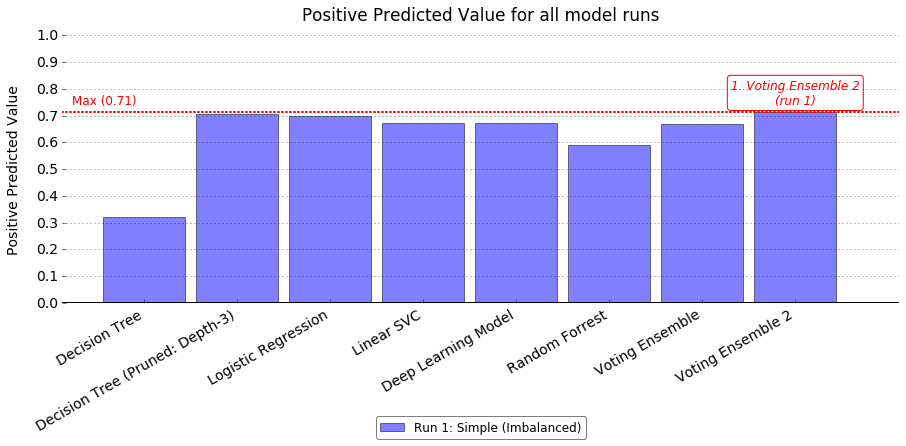

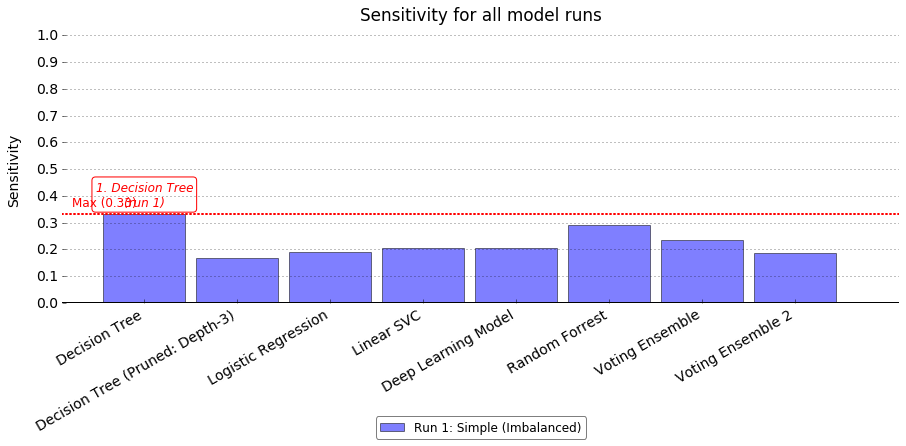

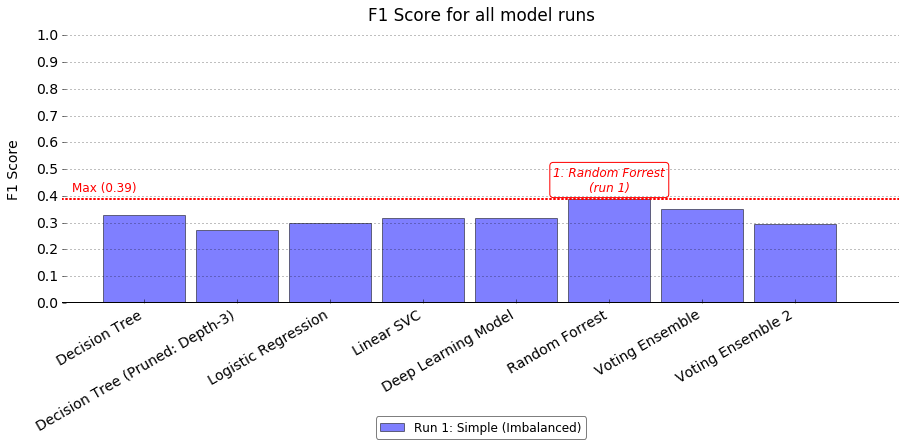

In [41]:
def plot_metric(run, metric):
    fig, ax = plt.subplots(figsize=(15, 6))
    x = np.arange(len(Run_Results_All['Model Name'].unique()))
    bar_width = 0.88/run
    alpha=0.5
    
    #List of description of model runs
    labels = ['Run 1: Simple (Imbalanced)',
              'Run 2: Additional feature engineering (Imbalanced)',
              'Run 3: Oversampled training',
              'Run 4: Undersampled training']
    
    #Generate graph objects per run
    for run in range(1,run+1,1):
        bar_n = ax.bar(x + run*bar_width, Run_Results_All.loc[Run_Results_All['Run'] == str(run), metric]
                       ,width=bar_width, label=labels[run-1], alpha=alpha)
    
    #add horizontal line
    max_val = Run_Results_All[metric].max()
    plt.axhline(y=max_val, linewidth=2, color='r', linestyle =':',dash_capstyle='round')
    ax.annotate('Max (' + f"{max_val:0.2}" + ')', xy=(0.1, max_val+0.03), color = 'r', fontsize = 12)

    #add Box with Rank 1 Metric model name
    #build list of max model names, with their correspodning runs and their x-coords
    max_model = Run_Results_All.loc[Run_Results_All[metric] == Run_Results_All[metric].max()]['Model Name'].tolist()
    max_run  = Run_Results_All.loc[Run_Results_All[metric] == Run_Results_All[metric].max()]['Run'].tolist()
    #max_run = int(max_run[0])
    #untested for multiple max models
    x_coord =[]
    for i, j in enumerate(Run_Results_All['Model Name'].unique()):
        for models in max_model:
            if j == models: x_coord.append(i)

    for i in range(0,len(max_model)):
        label = "1. " + max_model[i] + "\n(run " + max_run[i] + ")"
        ax.annotate(label, xy=(x_coord[i] + bar_width*int(max_run[i]), max_val+0.03), color = 'r'
                    , fontsize = 12, fontstyle='italic', horizontalalignment ='center'
                    , bbox=dict(boxstyle="round", facecolor='none', edgecolor='red',  alpha=1) )

    #--------------------------------------------------------------------------
    #STYLING
    #--------------------------------------------------------------------------
    #plt.setp(ax[i].get_xticklabels(), rotation=30, horizontalalignment='right')
    plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')

    # Fix the x-axes.
    #x-ticks aligned with number fo bars using 0.5(1+run)bar_width
    ax.set_xticks(x+0.5*bar_width*(run+1))
    ax.set_xticklabels(Run_Results_All['Model Name'].unique())
    ax.set_yticks(np.arange(0, 1.1, 0.1))
    plt.ylim(0,1)

    # Shrink graph object, to add legend below chart
    # Shrink current axis's height by 10% on the bottom
    box = ax.get_position()
    ax.set_position([box.x0, box.y0 + box.height * 0.2,
                    box.width, box.height * 0.8])

    # Put a legend below current axis
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.4),
              fancybox=True, shadow=False, ncol=2, framealpha=0.5, fontsize=12)
    
    # Grid styling.    
    ax.grid(zorder=0)
    
    # Axis styling.
    ax.yaxis.grid(True)
    ax.xaxis.grid(False)
    
    # Turn x axis on
    xmin, xmax = ax.get_xaxis().get_view_interval()
    ymin, ymax = ax.get_yaxis().get_view_interval()
    ax.add_artist(plt.Line2D((xmin, xmax), (ymin, ymin), color='black', linewidth=2))

    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    
    # Add axis and chart labels.
    #ax.set_xlabel('Models', labelpad=15)
    ax.set_ylabel(metric, labelpad=15)
    ax.set_title(metric + " for all model runs", pad=15)
    plt.box(on=None)
    plt.show()


run=1
plot_metric(run = run, metric='Positive Predicted Value')
plot_metric(run = run, metric='Sensitivity')
plot_metric(run = run, metric='F1 Score')

***
#  PART 4 - Model Development (Run 2: using additional Feature Engineering)
***

## 4.1) STEP 6: Feature Engineering

### *STEP 6A: Remove Potential Redundancy*

In [42]:
df_run2 = df.copy()
del df_run2['previous']

### *STEP 6B: One-Hot Encoding*

In [43]:
#Set target and features
target = 'y'
features = df_run2.columns.tolist()
features.remove(target)
X = df_run2[features]
y = df_run2[[target]]
print(features)

['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


In [44]:
#One Hot encoding
dict_month_map = {'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}
dict_week_map = {'mon':1,'tue':2,'wed':3,'thu':4,'fri':5,'sat':6,'sun':7}
dict_target_map = {'yes':1,'no':0}

#Perform manual one-hot encoding for the below variables
#This ensures that they are encoded the way one would expect
#Note, Python will issue a warning as we are changing the type from character to numeric
X['month'].replace(dict_month_map, inplace=True)
X['day_of_week'].replace(dict_week_map, inplace=True)
y['y'].replace(dict_target_map, inplace=True)

#Extract list of character variables (this will exclude the above three)
char_list=[]
for col in X.columns:
    if  np.issubdtype(X[col].dtype, np.datetime64) or  np.issubdtype(X[col].dtype, np.number): pass
    else: char_list.append(col.upper())
        
#Perform one-hot encoding on remaining variables:
#New variables have previous column name prefixed to new name
X_onehot = pd.get_dummies(X, prefix=char_list, prefix_sep="_")
X_onehot.columns

C:\Users\harsh\anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


Index(['age', 'month', 'day_of_week', 'campaign', 'pdays', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'JOB_admin.', 'JOB_blue-collar', 'JOB_entrepreneur', 'JOB_housemaid',
       'JOB_management', 'JOB_retired', 'JOB_self-employed', 'JOB_services',
       'JOB_student', 'JOB_technician', 'JOB_unemployed', 'JOB_unknown',
       'MARITAL_divorced', 'MARITAL_married', 'MARITAL_single',
       'MARITAL_unknown', 'EDUCATION_basic.4y', 'EDUCATION_basic.6y',
       'EDUCATION_basic.9y', 'EDUCATION_high.school', 'EDUCATION_illiterate',
       'EDUCATION_professional.course', 'EDUCATION_university.degree',
       'EDUCATION_unknown', 'DEFAULT_no', 'DEFAULT_unknown', 'DEFAULT_yes',
       'HOUSING_no', 'HOUSING_unknown', 'HOUSING_yes', 'LOAN_no',
       'LOAN_unknown', 'LOAN_yes', 'CONTACT_cellular', 'CONTACT_telephone',
       'POUTCOME_failure', 'POUTCOME_nonexistent', 'POUTCOME_success'],
      dtype='object')

### *STEP 6C: Binning*

In [45]:
X_onehot['age-bin']          = pd.qcut(X_onehot["age"], 10, labels=False)
X_onehot['campaign-bin']     = pd.cut(X_onehot['campaign'], bins=[-1, 1, 2, 3, 6, 8, 60], labels=False)
X_onehot['pdays-bin']        = pd.cut(X_onehot['pdays'], bins=[-1, 0, 1, 2, 3, 6, 12, 30, 1000], labels=False)
X_onehot['empvarate-bin']    = pd.cut(X_onehot['emp.var.rate'], 5, labels=False)
X_onehot['conspriceidx-bin'] = pd.qcut(X_onehot['cons.price.idx'], 6, labels=False)
X_onehot['consconfidx-bin']  = pd.qcut(X_onehot['cons.conf.idx'], 6, labels=False)
X_onehot['euribor3m-bin']    = pd.qcut(X_onehot['euribor3m'], 10, labels=False)
X_onehot['employed-bin']     = pd.cut(X_onehot['nr.employed'], 5, labels=False)

del X_onehot['age']
del X_onehot['campaign']
del X_onehot['pdays']
del X_onehot['emp.var.rate']
del X_onehot['cons.price.idx']
del X_onehot['cons.conf.idx']
del X_onehot['euribor3m']
del X_onehot['nr.employed']

### *STEP 6D: Scaling*

In [46]:
import pandas as pd    
from sklearn.preprocessing import StandardScaler

X_feature_engd = pd.DataFrame(StandardScaler().fit_transform(X_onehot),columns = X_onehot.columns)

### *STEP 6E: Split Data Set into Training and Validation Data*

In [47]:
# 80% training and 20% test
random_state=42
X_train, X_test, y_train, y_test = train_test_split(X_feature_engd, y, test_size=0.2, random_state=random_state)

# Some model functions such as SVM models and Logistic Regression 
# only accept 1D arrays for their single classification target, so convert Y to an array
y_train_array = y_train.values.ravel()
y_test_array = y_test.values.ravel()

## 4.2) STEP 7: Model Training

### *Set Up Modelling and Evaluation Scoring Functions*

In [48]:
#Initialise Results Table (without plots)
Results_Table = pd.DataFrame(columns=['Model Name','Positive Predicted Value','Accuracy','AUC / c-statistic','F1 Score','Sensitivity','Train Time','Predict Time'])
y_pred = []
y_pred_perc = []
Train_Time = Predict_Time = 0
def Generate_Results_Stats_NO_PLOTS(title_txt, y_test, y_pred, y_pred_perc, Train_Time, Predict_Time):

    import seaborn as sns
    import matplotlib.pyplot as plt     
    from matplotlib.pyplot import figure
    from sklearn.metrics import confusion_matrix
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.metrics import roc_curve, roc_auc_score
    import scikitplot as skplt

    ##################################
    # STEP 1. Build Confusion Matrix #
    ##################################

    #Build Confusion Matrix
    conf_matrix = confusion_matrix(y_test, pd.DataFrame(y_pred, columns=['y']))
    conf_matrix

    #Print values
    TN, FP, FN, TP = conf_matrix.ravel()
    

    ########################################
    # STEP 5. Add Metrics to Results Table #
    ########################################
    
    #Some Common Metrics
    score_Accuracy     = (TP + TN) / (TP + FP + FN + TN)   
    score_Sensitivity  = TP / (TP + FN) 
    score_Specificity  = TN / (TN + FP) 
    score_PosPredValue = TP / (TP + FP) 
    score_NegPredValue = TN / (TN + FN) 
    score_ErrorRate    = (FP + FN) / (TP + FP + FN + TN)   
    
    new_row =   {'Model Name'                  :title_txt,
                 'Positive Predicted Value'    :score_PosPredValue,
                 'Accuracy'                    :score_acc,
                 'AUC / c-statistic'           :score_AUC,
                 'F1 Score'                    :score_F1,
                 'Sensitivity'                 :score_Sensitivity,
                 'Train Time'                  :Train_Time,
                 'Predict Time'                :Predict_Time
                }
    
    #append row to the dataframe
    global Results_Table
    Results_Table = Results_Table.append(new_row, ignore_index=True)
    
    #Output x and y parameters for ROC Curves to be plotted later
    fpr , tpr, thresholds = roc_curve(y_test, y_pred_perc[:,1])
       
    return fpr, tpr

In [49]:
#Since I will be scoring multiple models and generating the same fit statistics, use a function to generate these
#Needs to be rerun on run2, as run 1 was holding onto the old ytest and Xtest
def pred_score(fitted_model, y_test=y_test, X_test=X_test):
    
    start = time.time()
    
    #Predict the response for test dataset
    y_pred = fitted_model.predict(X_test)
    y_pred_perc = fitted_model.predict_proba(X_test)

    end = time.time()
    
    #Generate metrics
    score_acc    = metrics.accuracy_score(y_test, y_pred)
    score_F1     = metrics.f1_score(y_test, y_pred)
    score_AUC    = metrics.roc_auc_score(y_test, y_pred_perc[:,1])
    Predict_Time = timedelta(seconds=(end - start))
    
    return y_pred, y_pred_perc, score_acc, score_F1, score_AUC, Predict_Time


### *Rerunning All Models*

In [50]:
#-------------------------------------------------------------------------------------------
# STEP 7A (i): Decision Tree Model (M1)
#-------------------------------------------------------------------------------------------

# Create Decision Tree classifer object
M1_DecisionTree = DecisionTreeClassifier(random_state=random_state)

start = time.time()

# Train Decision Tree Classifer
R2M1 = M1_DecisionTree.fit(X_train,y_train)

end = time.time()
Train_Time = timedelta(seconds=(end - start))

# Score model and generate fit statistics
y_pred, y_pred_perc, score_acc, score_F1, score_AUC, Predict_Time = pred_score(fitted_model = R2M1)

fpr1,tpr1 = Generate_Results_Stats_NO_PLOTS(title_txt="Decision Tree", y_test=y_test, y_pred=y_pred, y_pred_perc=y_pred_perc, Train_Time=Train_Time, Predict_Time=Predict_Time)

#-------------------------------------------------------------------------------------------
# STEP 7A (ii): Optimizing the Decision Tree Model (M1.1)
# (Attribute Selection: Entropy and Max Depth of Tree)
#-------------------------------------------------------------------------------------------

# Create Decision Tree classifer object
M1_1_DecisionTreePruned = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=random_state)

start = time.time()

# Train Decision Tree Classifer
R2M2 = M1_1_DecisionTreePruned.fit(X_train,y_train)

end = time.time()
Train_Time = timedelta(seconds=(end - start))

# Score model and generate fit statistics
y_pred, y_pred_perc, score_acc, score_F1, score_AUC, Predict_Time  = pred_score(fitted_model = R2M2)

fpr2,tpr2 = Generate_Results_Stats_NO_PLOTS(title_txt="Decision Tree (Pruned: Depth-3)", y_test=y_test, y_pred=y_pred, y_pred_perc=y_pred_perc, Train_Time=Train_Time, Predict_Time=Predict_Time)


#-------------------------------------------------------------------------------------------
# STEP 7B: Logistic Regression Model (M2)
#-------------------------------------------------------------------------------------------

# Create Logistic Regression object
M2_LogisticRegression = LogisticRegression(C=0.01, solver='liblinear', random_state=random_state) #C is the regularization: lower is stronger reg


start = time.time()

# Train Logistic Regression Classifer
R2M3 = M2_LogisticRegression.fit(X_train,y_train_array) 
end = time.time()
Train_Time = timedelta(seconds=(end - start))

# Score model and generate fit statistics
y_pred, y_pred_perc, score_acc, score_F1, score_AUC, Predict_Time = pred_score(fitted_model = R2M3, y_test=y_test_array)

fpr3,tpr3 = Generate_Results_Stats_NO_PLOTS(title_txt="Logistic Regression", y_test=y_test, y_pred=y_pred, y_pred_perc=y_pred_perc, Train_Time=Train_Time, Predict_Time=Predict_Time)

#-------------------------------------------------------------------------------------------
# STEP 7C: SVC Model (M3)
#-------------------------------------------------------------------------------------------

# Create SVM object
M3_LinearSVC = CalibratedClassifierCV(base_estimator=LinearSVC(C = 1.0, dual = False,random_state=random_state), cv=5)

start = time.time()

# Train SVM Classifer
R2M4 = M3_LinearSVC.fit(X_train,y_train_array)

end = time.time()
Train_Time = timedelta(seconds=(end - start))

# Score model and generate fit statistics
y_pred, y_pred_perc, score_acc, score_F1, score_AUC, Predict_Time = pred_score(fitted_model = R2M4, y_test=y_test_array)

fpr4,tpr4 = Generate_Results_Stats_NO_PLOTS(title_txt="Linear SVC", y_test=y_test, y_pred=y_pred, y_pred_perc=y_pred_perc, Train_Time=Train_Time, Predict_Time=Predict_Time)


#-------------------------------------------------------------------------------------------
# STEP 7D: Deep Learning Model (Multilayer Perceptron Model: M4)
#-------------------------------------------------------------------------------------------
if IBM:
    
    # Set uniform hidden layer nodes
    nodes = 200
    
    # Set up Deep Learning Model / Architecture
    R2M5 = Sequential()
    R2M5.add(Dense(nodes, input_shape=(X_train.shape[1],), activity_regularizer=regularizers.l2(0.01)))
    R2M5.add(Activation('relu'))
    R2M5.add(Dropout(rate=0.3))
    R2M5.add(Dense(nodes, activity_regularizer=regularizers.l2(0.01)))
    R2M5.add(Activation('relu'))
    R2M5.add(Dropout(rate=0.3))
    R2M5.add(Dense(1))
    R2M5.add(Activation('sigmoid'))
    R2M5.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Model Summary
    R2M5.summary()

    # Training Model 
    from keras.callbacks import History 
    history = History()

    batch_size = 32
    epochs = 100

    start = time.time()

    history = R2M5.fit(X_train, y_train,
                batch_size=batch_size,
                epochs=epochs,
                verbose=1,
                validation_data=(X_test, y_test))

    end = time.time()
    Train_Time = timedelta(seconds=(end - start))

    start = time.time()
    
    Y_pred_perc = R2M5.predict(X_test)
    Y_pred = (Y_pred_perc > 0.5).astype("int64")

    end = time.time()
    Predict_Time = timedelta(seconds=(end - start))
    
    # Generate stats
    score  = R2M5.evaluate(X_test, y_test, verbose=0)
        
    score_acc   = metrics.accuracy_score(y_test, y_pred)
    score_F1    = metrics.f1_score(y_test, y_pred)
    score_AUC   = metrics.roc_auc_score(y_test, y_pred_perc[:,1])
    print("Accuracy:",score_acc)

    fpr8,tpr8 = Generate_Results_Stats_NO_PLOTS(title_txt="Deep Learning Model", y_test=y_test, y_pred=y_pred, y_pred_perc=y_pred_perc, Train_Time=Train_Time, Predict_Time=Predict_Time)
    
#-------------------------------------------------------------------------------------------
# STEP 7E (i): Ensemble Models: Random Forrest (M5.1)
#-------------------------------------------------------------------------------------------

# Create Random Forrest object with 100 trees
M5_RandomForrest = RandomForestClassifier(n_estimators=100, bootstrap = True, max_features = 'sqrt', random_state=random_state)

start = time.time()

# Train Random Forrest Classifer
R2M6 = M5_RandomForrest.fit(X_train, y_train_array)

end = time.time()
Train_Time = timedelta(seconds=(end - start))

# Score model and generate fit statistics
y_pred, y_pred_perc, score_acc, score_F1, score_AUC, Predict_Time = pred_score(fitted_model = R2M6, y_test=y_test_array)

fpr5,tpr5 = Generate_Results_Stats_NO_PLOTS(title_txt="Random Forrest", y_test=y_test, y_pred=y_pred, y_pred_perc=y_pred_perc, Train_Time=Train_Time, Predict_Time=Predict_Time)

#-------------------------------------------------------------------------------------------
# STEP 7E (ii): Ensemble Models: Voting (M5.2)
#-------------------------------------------------------------------------------------------

# Create Voting Ensemble object - using previously definited model objects
M5_Ensemble_1 = VotingClassifier(estimators=[('dt_1',  M1_DecisionTree), 
                                             ('dt_2',  M1_1_DecisionTreePruned), 
                                             ('lgr',   M2_LogisticRegression), 
                                             ('svc',   M3_LinearSVC)], voting='soft')

start = time.time()

# Train Voting Ensemble Classifer
R2M7 = M5_Ensemble_1.fit(X_train,y_train_array)

end = time.time()
Train_Time = timedelta(seconds=(end - start))

# Score model and generate fit statistics
y_pred, y_pred_perc, score_acc, score_F1, score_AUC, Predict_Time = pred_score(fitted_model = R2M7, y_test=y_test_array)

fpr6,tpr6 = Generate_Results_Stats_NO_PLOTS(title_txt="Voting Ensemble", y_test=y_test, y_pred=y_pred, y_pred_perc=y_pred_perc, Train_Time=Train_Time, Predict_Time=Predict_Time)

#-------------------------------------------------------------------------------------------
# STEP 7E (iii): Ensemble Models: Voting (No Decision Tree) (M5.3)
#-------------------------------------------------------------------------------------------

# Create Voting Ensemble object - using previously definited model objects
M5_Ensemble_2 = VotingClassifier(estimators=[('dt_2',  M1_1_DecisionTreePruned), 
                                             ('lgr',   M2_LogisticRegression), 
                                             ('svc',   M3_LinearSVC)], voting='soft')

start = time.time()

# Train Voting Ensemble Classifer
R2M8 = M5_Ensemble_2.fit(X_train,y_train_array)

end = time.time()
Train_Time = timedelta(seconds=(end - start))

# Score model and generate fit statistics
y_pred, y_pred_perc, score_acc, score_F1, score_AUC, Predict_Time = pred_score(fitted_model = R2M8, y_test=y_test_array)

fpr7,tpr7 = Generate_Results_Stats_NO_PLOTS(title_txt="Voting Ensemble 2", y_test=y_test, y_pred=y_pred, y_pred_perc=y_pred_perc, Train_Time=Train_Time, Predict_Time=Predict_Time)



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 200)               9800      
_________________________________________________________________
activation_3 (Activation)    (None, 200)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 200)               40200     
_________________________________________________________________
activation_4 (Activation)    (None, 200)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                

## 4.3) STEP 8: Model Evaluation & Comparison

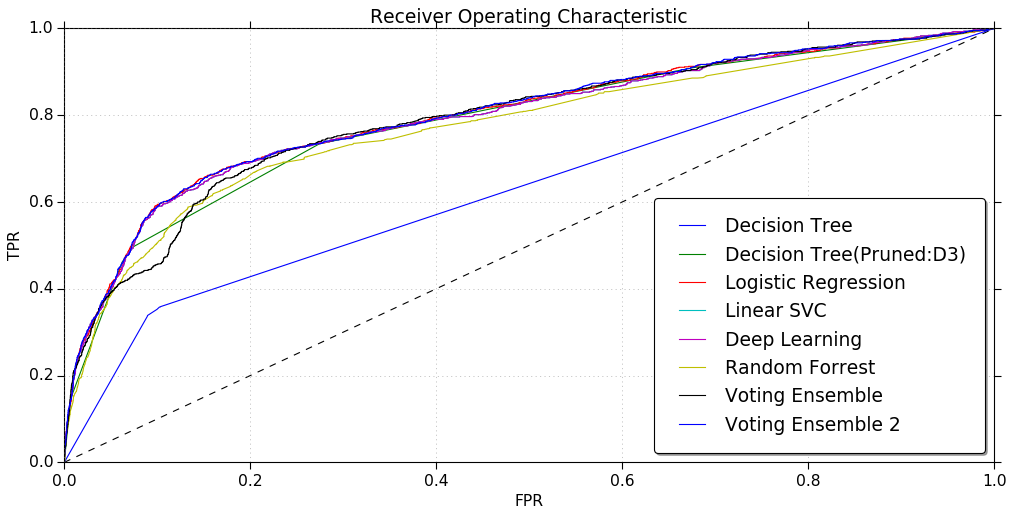


------------------------------------------------------------------------------------------
            1. SELECT THIS MODEL TO MAXIMISE THE RESPONSE RATE FROM CUSTOMERS:            
------------------------------------------------------------------------------------------

Highest PPV+ Model:  Voting Ensemble 2 


------------------------------------------------------------------------------------------
                2. SELECT THIS MODEL TO ENSURE GREATEST PREDICTIVE POWER:                 
------------------------------------------------------------------------------------------

Highest AUC Model:   Voting Ensemble 2 



,Model Name,Positive Predicted Value,Accuracy,AUC / c-statistic,F1 Score,Sensitivity,Train Time,Predict Time,Run
0,Decision Tree,0.320539,0.845584,0.625463,0.327157,0.334054,00:00:00.219168,00:00:00.010093,1
1,Decision Tree (Pruned: Depth-3),0.707207,0.898797,0.784006,0.273758,0.169730,00:00:00.062312,00:00:00.006543,1
2,Logistic Regression,0.698413,0.899769,0.789807,0.299065,0.190270,00:00:00.226808,00:00:00.010164,1
3,Linear SVC,0.672535,0.899526,0.786411,0.315964,0.206486,00:00:00.655039,00:00:00.015625,1
4,Deep Learning Model,0.672535,0.899526,0.786411,0.315964,0.206486,00:02:25.117282,00:00:00.216204,1
5,Random Forrest,0.589011,0.897461,0.779822,0.388406,0.289730,00:00:02.943218,00:00:00.295033,1
6,Voting Ensemble,0.669725,0.901106,0.790258,0.349840,0.236757,00:00:01.084605,00:00:00.046863,1
7,Voting Ensemble 2,0.713693,0.900134,0.798424,0.295026,0.185946,00:00:00.870200,00:00:00.015627,1
0,Decision Tree,0.323681,0.846191,0.629021,0.330867,0.338378,00:00:00.178396,00:00:00.022119,2
1,Decision Tree (Pruned: Depth-3),0.704433,0.897704,0.785658,0.253546,0.154595,00:00:00.046901,00:00:00,2


In [51]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline

plt.figure(num=None, figsize=(15, 7), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 14})
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr1, tpr1, label= "Decision Tree")
plt.plot(fpr2, tpr2, label= "Decision Tree(Pruned:D3)")
plt.plot(fpr3, tpr3, label= "Logistic Regression")
plt.plot(fpr4, tpr4, label= "Linear SVC")
#If Deep Learning model has not been run (ie if running locally) then skip:
try:
    fpr8
except NameError:
    pass
else:
    plt.plot(fpr8, tpr8, label= "Deep Learning")
plt.plot(fpr5, tpr5, label= "Random Forrest")
plt.plot(fpr6, tpr6, label= "Voting Ensemble")
plt.plot(fpr7, tpr7, label= "Voting Ensemble 2")
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('Receiver Operating Characteristic')
plt.grid()
plt.xlim(0, 1)
plt.ylim(0, 1) 
plt.legend(loc='lower right', fancybox=True, framealpha=1, shadow=True, borderpad=1)
plt.tick_params(direction='out', length=6, width=1, colors='black', grid_color='grey', grid_alpha=0.8)
plt.show()

#Maximising Response Rate from customers, select this model: 
title(text='1. Select this model to maximise the response rate from customers:')
print("Highest PPV+ Model: ",Results_Table.iloc[Results_Table['Positive Predicted Value'].idxmax(),0],'\n')

#Maximising predictive power of model, select this model: 
title(text='2. Select this model to ensure greatest predictive power:')
print("Highest AUC Model:  ",Results_Table.iloc[Results_Table['AUC / c-statistic'].idxmax(),0],'\n')

Run_2_Results = Results_Table.copy()
Results_Table = []

Run_2_Results["Run"] = '2'
Run_Results_All = Run_Results_All.append(Run_2_Results, sort=False)
Run_Results_All

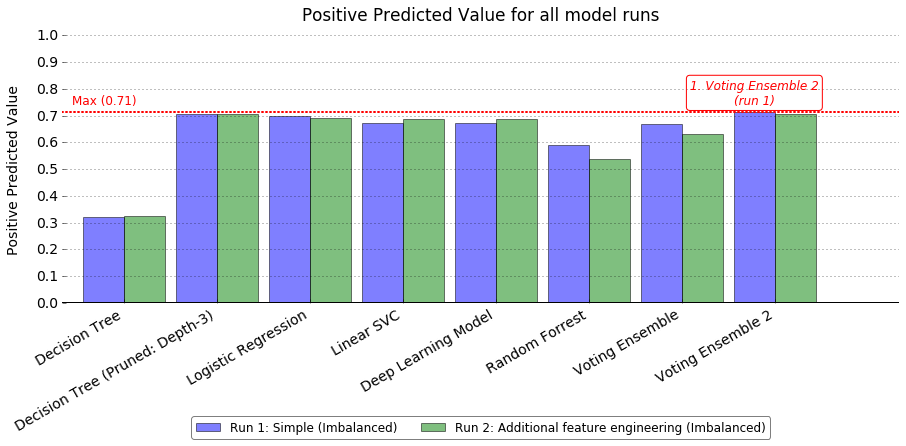

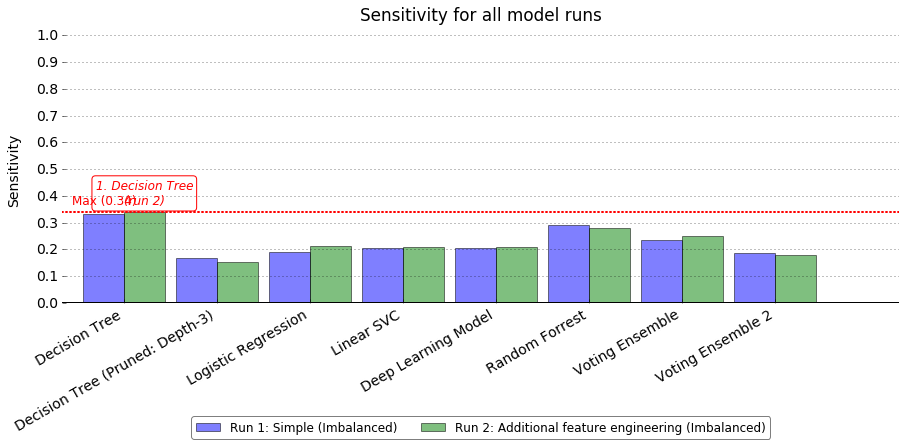

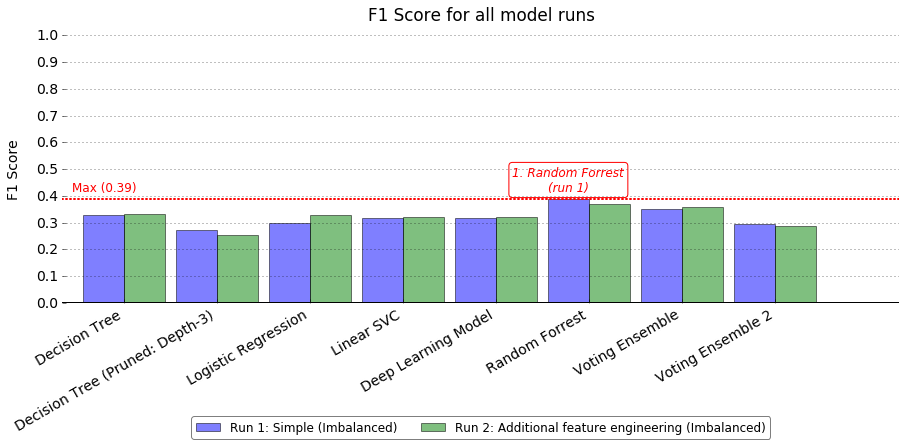

In [52]:
run=2
plot_metric(run = run, metric='Positive Predicted Value')
plot_metric(run = run, metric='Sensitivity')
plot_metric(run = run, metric='F1 Score')

**Comments:** Since run 1 and run 2 are largely similar and where they are not, run 1 had a much better PPV+ score, I will eliminate the additional feature engineering from subsequent runs. The key reason why these additional feature engineering processing steps had a negative effect could have been due to information loss in the grouping of variable values. Additionally, I will also not delete the 'previous' column. This was originally done to reduce a redundancy detection between this and other variables. However, from a business context, 'previous' had no relation to those indexes, so it makes sense to keep it. 

***
#  PART 5 - Model Development (Run 3: using Oversampling)
***

## 5.1) STEP 9: Feature Engineering

### *STEP 9A: Split Data Set into Training and Validation Data (Oversampling)*

Imbalanced data - there are 2 things that can be done to address imbalanced data:
1. Ignoring the problem.
2. Undersampling the majority class - removing some of the majority class records in the training data.
3. Oversampling the minority class - adding some of the minority class records in the training data.

Benefits
1. Ignoring - saves time
2. Undersampling - retains information balance between features, in our minority class
3. Oversampling the minority class - retains majority class information, while inflating minority class

Drawbacks:
1. Ignoring - models can be oversensitive to the minority class, descriminating target classes poorly.
2. Undersampling the majority class - throwing away potentially useful information
3. Oversampling the minority class - may lead to overfitting 

In runs 1 and 2, I ignored the problem. In run 3, I will opt to oversample, using the SMOTE algorithm. Instead of simply duplicating entries, this technique creates entries by interpolating the minority class, as well as undersampling the majority class.

In [53]:
from imblearn.over_sampling import SMOTE

# Split dataset into training and validation datasets
# 80% training and 20% test
random_state=42
X_train_imb, X_test, y_train_imb, y_test = train_test_split(X_onehot_run1, y, test_size=0.2, random_state=random_state)

print("Original training class frequencies:\n",y_train_imb.y.value_counts().sort_index(),sep="")
# oversampling the minority class to a 50:50 ratio of "yes" and "no" cases
X_train, y_train = SMOTE().fit_resample(X_train_imb, y_train_imb)

# Some model functions such as SVM models and Logistic Regression 
# only accept 1D arrays for their single classification target, so convert Y to array
y_train_array = y_train.values.ravel()
y_test_array = y_test.values.ravel()

print("Oversampled training class frequencies:\n",y_train.y.value_counts().sort_index(),sep="")

Original training class frequencies:
0    29206
1     3715
Name: y, dtype: int64
Oversampled training class frequencies:
0    29206
1    29206
Name: y, dtype: int64


## 5.2) STEP 10: Model Training

### *Set Up Modelling and Evaluation Scoring Functions*

In [54]:
#Initialise Results Table (without plots)
Results_Table = pd.DataFrame(columns=['Model Name','Positive Predicted Value','Accuracy','AUC / c-statistic','F1 Score','Sensitivity','Train Time','Predict Time'])
y_pred = []
y_pred_perc = []
Train_Time = Predict_Time = 0
def Generate_Results_Stats_NO_PLOTS(title_txt, y_test, y_pred, y_pred_perc, Train_Time, Predict_Time):

    import seaborn as sns
    import matplotlib.pyplot as plt     
    from matplotlib.pyplot import figure
    from sklearn.metrics import confusion_matrix
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.metrics import roc_curve, roc_auc_score
    import scikitplot as skplt

    ##################################
    # STEP 1. Build Confusion Matrix #
    ##################################

    #Build Confusion Matrix
    conf_matrix = confusion_matrix(y_test, pd.DataFrame(y_pred, columns=['y']))
    conf_matrix

    #Print values
    TN, FP, FN, TP = conf_matrix.ravel()
    

    ########################################
    # STEP 2. Add Metrics to Results Table #
    ########################################
    
    #Some Common Metrics
    score_Accuracy     = (TP + TN) / (TP + FP + FN + TN)   
    score_Sensitivity  = TP / (TP + FN) 
    score_Specificity  = TN / (TN + FP) 
    score_PosPredValue = TP / (TP + FP) 
    score_NegPredValue = TN / (TN + FN) 
    score_ErrorRate    = (FP + FN) / (TP + FP + FN + TN)   
    
    new_row =   {'Model Name'                  :title_txt,
                 'Positive Predicted Value'    :score_PosPredValue,
                 'Accuracy'                    :score_acc,
                 'AUC / c-statistic'           :score_AUC,
                 'F1 Score'                    :score_F1,
                 'Sensitivity'                 :score_Sensitivity,
                 'Train Time'                  :Train_Time,
                 'Predict Time'                :Predict_Time
                }
    
    #append row to the dataframe
    global Results_Table
    Results_Table = Results_Table.append(new_row, ignore_index=True)
    
    #Output x and y parameters for ROC Curves to be plotted later
    fpr , tpr, thresholds = roc_curve(y_test, y_pred_perc[:,1])
       
    return fpr, tpr

In [55]:
#Since I will be scoring multiple models and generating the same fit statistics, use a function to generate these
#Needs to be rerun on run2, as run 1 was holding onto the old ytest and Xtest
def pred_score(fitted_model, y_test=y_test, X_test=X_test):
    
    start = time.time()
    
    #Predict the response for test dataset
    y_pred = fitted_model.predict(X_test)
    y_pred_perc = fitted_model.predict_proba(X_test)

    end = time.time()
    
    #Generate metrics
    score_acc    = metrics.accuracy_score(y_test, y_pred)
    score_F1     = metrics.f1_score(y_test, y_pred)
    score_AUC    = metrics.roc_auc_score(y_test, y_pred_perc[:,1])
    Predict_Time = timedelta(seconds=(end - start))
    
    return y_pred, y_pred_perc, score_acc, score_F1, score_AUC, Predict_Time


### *Rerunning All Models*

In [56]:
#-------------------------------------------------------------------------------------------
# STEP 10A (i): Decision Tree Model (M1)
#-------------------------------------------------------------------------------------------

# Create Decision Tree classifer object
M1_DecisionTree = DecisionTreeClassifier(random_state=random_state)

start = time.time()

# Train Decision Tree Classifer
R3M1 = M1_DecisionTree.fit(X_train,y_train)

end = time.time()
Train_Time = timedelta(seconds=(end - start))

# Score model and generate fit statistics
y_pred, y_pred_perc, score_acc, score_F1, score_AUC, Predict_Time = pred_score(fitted_model = R3M1)

fpr1,tpr1 = Generate_Results_Stats_NO_PLOTS(title_txt="Decision Tree", y_test=y_test, y_pred=y_pred, y_pred_perc=y_pred_perc, Train_Time=Train_Time, Predict_Time=Predict_Time)

#-------------------------------------------------------------------------------------------
# STEP 10A (ii): Optimizing the Decision Tree Model (M1.1)
# (Attribute Selection: Entropy and Max Depth of Tree)
#-------------------------------------------------------------------------------------------

# Create Decision Tree classifer object
M1_1_DecisionTreePruned = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=random_state)

start = time.time()

# Train Decision Tree Classifer
R3M2 = M1_1_DecisionTreePruned.fit(X_train,y_train)

end = time.time()
Train_Time = timedelta(seconds=(end - start))

# Score model and generate fit statistics
y_pred, y_pred_perc, score_acc, score_F1, score_AUC, Predict_Time  = pred_score(fitted_model = R3M2)

fpr2,tpr2 = Generate_Results_Stats_NO_PLOTS(title_txt="Decision Tree (Pruned: Depth-3)", y_test=y_test, y_pred=y_pred, y_pred_perc=y_pred_perc, Train_Time=Train_Time, Predict_Time=Predict_Time)


#-------------------------------------------------------------------------------------------
# STEP 10B: Logistic Regression Model (M2)
#-------------------------------------------------------------------------------------------

# Create Logistic Regression object
M2_LogisticRegression = LogisticRegression(C=0.01, solver='liblinear', random_state=random_state) #C is the regularization: lower is stronger reg


start = time.time()

# Train Logistic Regression Classifer
R3M3 = M2_LogisticRegression.fit(X_train,y_train_array) 
end = time.time()
Train_Time = timedelta(seconds=(end - start))

# Score model and generate fit statistics
y_pred, y_pred_perc, score_acc, score_F1, score_AUC, Predict_Time = pred_score(fitted_model = R3M3, y_test=y_test_array)

fpr3,tpr3 = Generate_Results_Stats_NO_PLOTS(title_txt="Logistic Regression", y_test=y_test, y_pred=y_pred, y_pred_perc=y_pred_perc, Train_Time=Train_Time, Predict_Time=Predict_Time)

#-------------------------------------------------------------------------------------------
# STEP 10C: SVC Model (M3)
#-------------------------------------------------------------------------------------------

# Create SVM object
M3_LinearSVC = CalibratedClassifierCV(base_estimator=LinearSVC(C = 1.0, dual = False,random_state=random_state), cv=5)

start = time.time()

# Train SVM Classifer
R3M4 = M3_LinearSVC.fit(X_train,y_train_array)

end = time.time()
Train_Time = timedelta(seconds=(end - start))

# Score model and generate fit statistics
y_pred, y_pred_perc, score_acc, score_F1, score_AUC, Predict_Time = pred_score(fitted_model = R3M4, y_test=y_test_array)

fpr4,tpr4 = Generate_Results_Stats_NO_PLOTS(title_txt="Linear SVC", y_test=y_test, y_pred=y_pred, y_pred_perc=y_pred_perc, Train_Time=Train_Time, Predict_Time=Predict_Time)


#-------------------------------------------------------------------------------------------
# STEP 10D: Deep Learning Model (Multilayer Perceptron Model: M4)
#-------------------------------------------------------------------------------------------
if IBM:
    
    # Set uniform hidden layer nodes
    nodes = 200
    
    # Set up Deep Learning Model / Architecture
    R3M5 = Sequential()
    R3M5.add(Dense(nodes, input_shape=(X_train.shape[1],), activity_regularizer=regularizers.l2(0.01)))
    R3M5.add(Activation('relu'))
    R3M5.add(Dropout(rate=0.3))
    R3M5.add(Dense(nodes, activity_regularizer=regularizers.l2(0.01)))
    R3M5.add(Activation('relu'))
    R3M5.add(Dropout(rate=0.3))
    R3M5.add(Dense(1))
    R3M5.add(Activation('sigmoid'))
    R3M5.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Model Summary
    R3M5.summary()

    # Training Model 
    from keras.callbacks import History 
    history = History()

    batch_size = 32
    epochs = 100

    start = time.time()

    history = R3M5.fit(X_train, y_train,
                batch_size=batch_size,
                epochs=epochs,
                verbose=1,
                validation_data=(X_test, y_test))

    end = time.time()
    Train_Time = timedelta(seconds=(end - start))

    start = time.time()
    
    Y_pred_perc = R3M5.predict(X_test)
    Y_pred = (Y_pred_perc > 0.5).astype("int64")

    end = time.time()
    Predict_Time = timedelta(seconds=(end - start))
    
    # Generate stats
    score  = R3M5.evaluate(X_test, y_test, verbose=0)
    
    score_acc   = metrics.accuracy_score(y_test, y_pred)
    score_F1    = metrics.f1_score(y_test, y_pred)
    score_AUC   = metrics.roc_auc_score(y_test, y_pred_perc[:,1])
    print("Accuracy:",score_acc)

    fpr8,tpr8 = Generate_Results_Stats_NO_PLOTS(title_txt="Deep Learning Model", y_test=y_test, y_pred=y_pred, y_pred_perc=y_pred_perc, Train_Time=Train_Time, Predict_Time=Predict_Time)
    
#-------------------------------------------------------------------------------------------
# STEP 10E (i): Ensemble Models: Random Forrest (M5.1)
#-------------------------------------------------------------------------------------------

# Create Random Forrest object with 100 trees
M5_RandomForrest = RandomForestClassifier(n_estimators=100, bootstrap = True, max_features = 'sqrt', random_state=random_state)

start = time.time()

# Train Random Forrest Classifer
R3M6 = M5_RandomForrest.fit(X_train, y_train_array)

end = time.time()
Train_Time = timedelta(seconds=(end - start))

# Score model and generate fit statistics
y_pred, y_pred_perc, score_acc, score_F1, score_AUC, Predict_Time = pred_score(fitted_model = R3M6, y_test=y_test_array)

fpr5,tpr5 = Generate_Results_Stats_NO_PLOTS(title_txt="Random Forrest", y_test=y_test, y_pred=y_pred, y_pred_perc=y_pred_perc, Train_Time=Train_Time, Predict_Time=Predict_Time)

#-------------------------------------------------------------------------------------------
# STEP 10E (ii): Ensemble Models: Voting (M5.2)
#-------------------------------------------------------------------------------------------

# Create Voting Ensemble object - using previously definited model objects
M5_Ensemble_1 = VotingClassifier(estimators=[('dt_1',  M1_DecisionTree), 
                                             ('dt_2',  M1_1_DecisionTreePruned), 
                                             ('lgr',   M2_LogisticRegression), 
                                             ('svc',   M3_LinearSVC)], voting='soft')

start = time.time()

# Train Voting Ensemble Classifer
R3M7 = M5_Ensemble_1.fit(X_train,y_train_array)

end = time.time()
Train_Time = timedelta(seconds=(end - start))

# Score model and generate fit statistics
y_pred, y_pred_perc, score_acc, score_F1, score_AUC, Predict_Time = pred_score(fitted_model = R3M7, y_test=y_test_array)

fpr6,tpr6 = Generate_Results_Stats_NO_PLOTS(title_txt="Voting Ensemble", y_test=y_test, y_pred=y_pred, y_pred_perc=y_pred_perc, Train_Time=Train_Time, Predict_Time=Predict_Time)

#-------------------------------------------------------------------------------------------
# STEP 10E (iii): Ensemble Models: Voting (No Decision Tree) (M5.3)
#-------------------------------------------------------------------------------------------

# Create Voting Ensemble object - using previously definited model objects
M5_Ensemble_2 = VotingClassifier(estimators=[('dt_2',  M1_1_DecisionTreePruned), 
                                             ('lgr',   M2_LogisticRegression), 
                                             ('svc',   M3_LinearSVC)], voting='soft')

start = time.time()

# Train Voting Ensemble Classifer
R3M8 = M5_Ensemble_2.fit(X_train,y_train_array)

end = time.time()
Train_Time = timedelta(seconds=(end - start))

# Score model and generate fit statistics
y_pred, y_pred_perc, score_acc, score_F1, score_AUC, Predict_Time = pred_score(fitted_model = R3M8, y_test=y_test_array)

fpr7,tpr7 = Generate_Results_Stats_NO_PLOTS(title_txt="Voting Ensemble 2", y_test=y_test, y_pred=y_pred, y_pred_perc=y_pred_perc, Train_Time=Train_Time, Predict_Time=Predict_Time)



Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 200)               10000     
_________________________________________________________________
activation_6 (Activation)    (None, 200)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 200)               40200     
_________________________________________________________________
activation_7 (Activation)    (None, 200)               0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                

## 5.3) STEP 11: Model Evaluation & Comparison

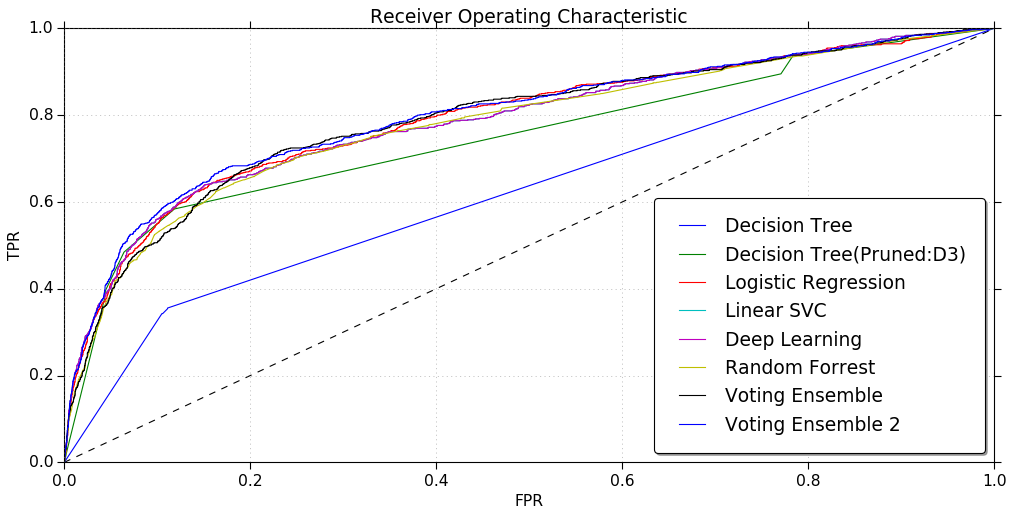


------------------------------------------------------------------------------------------
            1. SELECT THIS MODEL TO MAXIMISE THE RESPONSE RATE FROM CUSTOMERS:            
------------------------------------------------------------------------------------------

Highest PPV+ Model:  Linear SVC 


------------------------------------------------------------------------------------------
                2. SELECT THIS MODEL TO ENSURE GREATEST PREDICTIVE POWER:                 
------------------------------------------------------------------------------------------

Highest AUC Model:   Voting Ensemble 2 



In [57]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline

plt.figure(num=None, figsize=(15, 7), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 14})
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr1, tpr1, label= "Decision Tree")
plt.plot(fpr2, tpr2, label= "Decision Tree(Pruned:D3)")
plt.plot(fpr3, tpr3, label= "Logistic Regression")
plt.plot(fpr4, tpr4, label= "Linear SVC")
#If Deep Learning model has not been run (ie if running locally) then skip:
try:
    fpr8
except NameError:
    pass
else:
    plt.plot(fpr8, tpr8, label= "Deep Learning")
plt.plot(fpr5, tpr5, label= "Random Forrest")
plt.plot(fpr6, tpr6, label= "Voting Ensemble")
plt.plot(fpr7, tpr7, label= "Voting Ensemble 2")
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('Receiver Operating Characteristic')
plt.grid()
plt.xlim(0, 1)
plt.ylim(0, 1) 
plt.legend(loc='lower right', fancybox=True, framealpha=1, shadow=True, borderpad=1)
plt.tick_params(direction='out', length=6, width=1, colors='black', grid_color='grey', grid_alpha=0.8)
plt.show()

#Maximising Response Rate from customers, select this model: 
title(text='1. Select this model to maximise the response rate from customers:')
print("Highest PPV+ Model: ",Results_Table.iloc[Results_Table['Positive Predicted Value'].idxmax(),0],'\n')

#Maximising predictive power of model, select this model: 
title(text='2. Select this model to ensure greatest predictive power:')
print("Highest AUC Model:  ",Results_Table.iloc[Results_Table['AUC / c-statistic'].idxmax(),0],'\n')


In [58]:
Run_3_Results = Results_Table.copy()
Results_Table = []

Run_3_Results["Run"] = '3'
Run_Results_All = Run_Results_All.append(Run_3_Results, sort=False)
Run_Results_All

,Model Name,Positive Predicted Value,Accuracy,AUC / c-statistic,F1 Score,Sensitivity,Train Time,Predict Time,Run
0,Decision Tree,0.320539,0.845584,0.625463,0.327157,0.334054,00:00:00.219168,00:00:00.010093,1
1,Decision Tree (Pruned: Depth-3),0.707207,0.898797,0.784006,0.273758,0.169730,00:00:00.062312,00:00:00.006543,1
2,Logistic Regression,0.698413,0.899769,0.789807,0.299065,0.190270,00:00:00.226808,00:00:00.010164,1
3,Linear SVC,0.672535,0.899526,0.786411,0.315964,0.206486,00:00:00.655039,00:00:00.015625,1
4,Deep Learning Model,0.672535,0.899526,0.786411,0.315964,0.206486,00:02:25.117282,00:00:00.216204,1
5,Random Forrest,0.589011,0.897461,0.779822,0.388406,0.289730,00:00:02.943218,00:00:00.295033,1
6,Voting Ensemble,0.669725,0.901106,0.790258,0.349840,0.236757,00:00:01.084605,00:00:00.046863,1
7,Voting Ensemble 2,0.713693,0.900134,0.798424,0.295026,0.185946,00:00:00.870200,00:00:00.015627,1
0,Decision Tree,0.323681,0.846191,0.629021,0.330867,0.338378,00:00:00.178396,00:00:00.022119,2
1,Decision Tree (Pruned: Depth-3),0.704433,0.897704,0.785658,0.253546,0.154595,00:00:00.046901,00:00:00,2


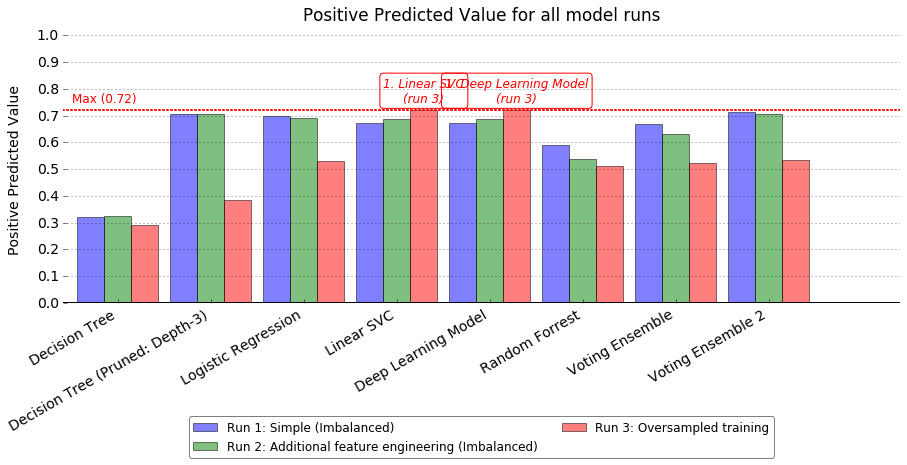

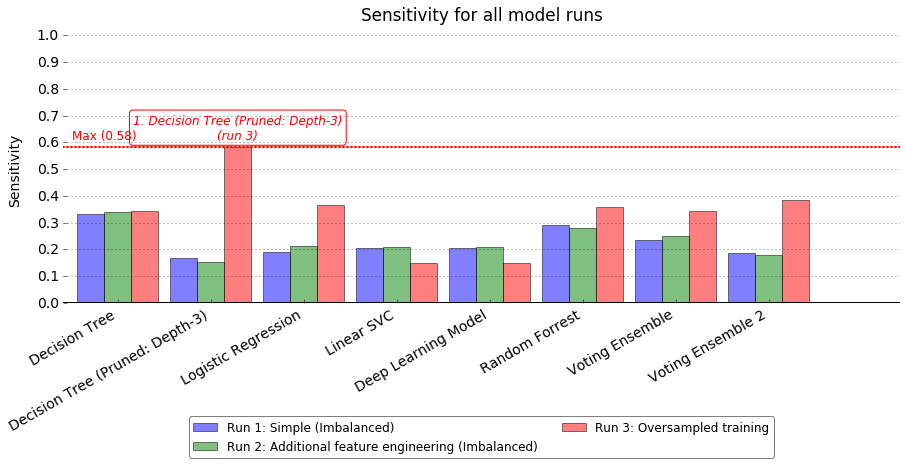

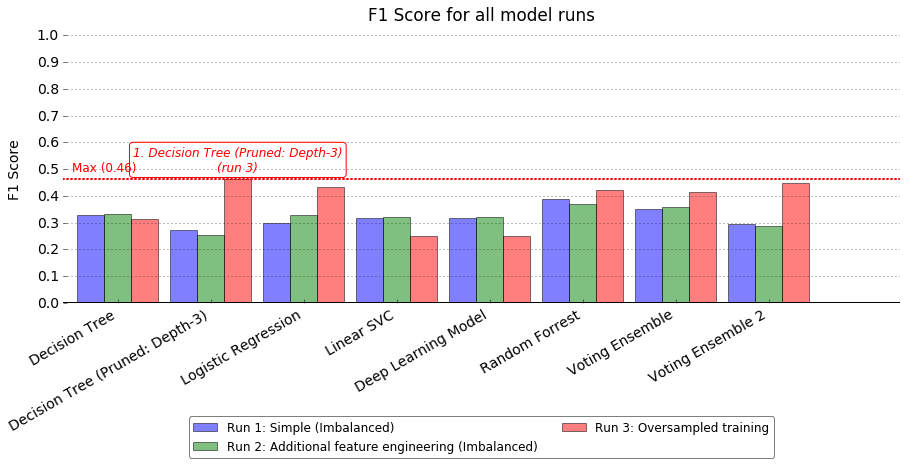

In [59]:
run = 3
plot_metric(run = run, metric='Positive Predicted Value')
plot_metric(run = run, metric='Sensitivity')
plot_metric(run = run, metric='F1 Score')

***
#  PART 6 - Model Development (Run 4: using Undersampling)
***

## 6.1) STEP 12: Feature Engineering

### *STEP 12A: Split Data Set into Training and Validation Data (Oversampling)*

Imbalanced data - there are 2 things that can be done to address imbalanced data:
1. Ignoring the problem.
2. Undersampling the majority class - removing some of the majority class records in the training data.
3. Oversampling the minority class - adding some of the minority class records in the training data.

Benefits
1. Ignoring - saves time
2. Undersampling - retains information balance between features, in our minority class
3. Oversampling the minority class - retains majority class information, while inflating minority class

Drawbacks:
1. Ignoring - models can be oversensitive to the minority class, descriminating target classes poorly.
2. Undersampling the majority class - throwing away potentially useful information
3. Oversampling the minority class - may lead to overfitting 

In runs 1 and 2, I ignored the problem. In run 3, I oversampled. In run 4, I will opt to undersample, using the Randomundersampler. This technique is a fast and easy way to balance the data by randomly selecting a subset of data for the minority class.

In [60]:
from imblearn.under_sampling import RandomUnderSampler

# Split dataset into training and validation datasets
# 80% training and 20% test
X_train_imb, X_test, y_train_imb, y_test = train_test_split(X_onehot_run1, y, test_size=0.2, random_state=random_state)

print("Original training class frequencies:\n",y_train_imb.y.value_counts().sort_index(),sep="")
# undersampling the minority class to a 50:50 ratio of "yes" and "no" cases
rus = RandomUnderSampler(random_state=0)
X_train, y_train = rus.fit_resample(X_train_imb, y_train_imb)

# Some model functions such as SVM models and Logistic Regression 
# only accept 1D arrays for their single classification target, so convert Y to array
y_train_array = y_train.values.ravel()
y_test_array = y_test.values.ravel()

print("Undersampled training class frequencies:\n",y_train.y.value_counts().sort_index(),sep="")

Original training class frequencies:
0    29206
1     3715
Name: y, dtype: int64
Undersampled training class frequencies:
0    3715
1    3715
Name: y, dtype: int64


## 6.2) STEP 13: Model Training

### *Set Up Modelling and Evaluation Scoring Functions*

In [61]:
#Initialise Results Table (without plots)
Results_Table = pd.DataFrame(columns=['Model Name','Positive Predicted Value','Accuracy','AUC / c-statistic','F1 Score','Sensitivity','Train Time','Predict Time'])
y_pred = []
y_pred_perc = []
Train_Time = Predict_Time = 0
def Generate_Results_Stats_NO_PLOTS(title_txt, y_test, y_pred, y_pred_perc, Train_Time, Predict_Time):

    import seaborn as sns
    import matplotlib.pyplot as plt     
    from matplotlib.pyplot import figure
    from sklearn.metrics import confusion_matrix
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.metrics import roc_curve, roc_auc_score
    import scikitplot as skplt

    ##################################
    # STEP 1. Build Confusion Matrix #
    ##################################

    #Build Confusion Matrix
    conf_matrix = confusion_matrix(y_test, pd.DataFrame(y_pred, columns=['y']))
    conf_matrix

    #Print values
    TN, FP, FN, TP = conf_matrix.ravel()
    

    ########################################
    # STEP 2. Add Metrics to Results Table #
    ########################################
    
    #Some Common Metrics
    score_Accuracy     = (TP + TN) / (TP + FP + FN + TN)   
    score_Sensitivity  = TP / (TP + FN) 
    score_Specificity  = TN / (TN + FP) 
    score_PosPredValue = TP / (TP + FP) 
    score_NegPredValue = TN / (TN + FN) 
    score_ErrorRate    = (FP + FN) / (TP + FP + FN + TN)   
    
    new_row =   {'Model Name'                  :title_txt,
                 'Positive Predicted Value'    :score_PosPredValue,
                 'Accuracy'                    :score_acc,
                 'AUC / c-statistic'           :score_AUC,
                 'F1 Score'                    :score_F1,
                 'Sensitivity'                 :score_Sensitivity,
                 'Train Time'                  :Train_Time,
                 'Predict Time'                :Predict_Time
                }
    
    #append row to the dataframe
    global Results_Table
    Results_Table = Results_Table.append(new_row, ignore_index=True)
    
    #Output x and y parameters for ROC Curves to be plotted later
    fpr , tpr, thresholds = roc_curve(y_test, y_pred_perc[:,1])
       
    return fpr, tpr

In [62]:
#Since I will be scoring multiple models and generating the same fit statistics, use a function to generate these
#Needs to be rerun on run2, as run 1 was holding onto the old ytest and Xtest
def pred_score(fitted_model, y_test=y_test, X_test=X_test):
    
    start = time.time()
    
    #Predict the response for test dataset
    y_pred = fitted_model.predict(X_test)
    y_pred_perc = fitted_model.predict_proba(X_test)

    end = time.time()
    
    #Generate metrics
    score_acc    = metrics.accuracy_score(y_test, y_pred)
    score_F1     = metrics.f1_score(y_test, y_pred)
    score_AUC    = metrics.roc_auc_score(y_test, y_pred_perc[:,1])
    Predict_Time = timedelta(seconds=(end - start))
    
    return y_pred, y_pred_perc, score_acc, score_F1, score_AUC, Predict_Time


### *Rerunning All Models*

In [63]:
#-------------------------------------------------------------------------------------------
# STEP 10A (i): Decision Tree Model (M1)
#-------------------------------------------------------------------------------------------

# Create Decision Tree classifer object
M1_DecisionTree = DecisionTreeClassifier(random_state=random_state)

start = time.time()

# Train Decision Tree Classifer
R4M1 = M1_DecisionTree.fit(X_train,y_train)

end = time.time()
Train_Time = timedelta(seconds=(end - start))

# Score model and generate fit statistics
y_pred, y_pred_perc, score_acc, score_F1, score_AUC, Predict_Time = pred_score(fitted_model = R4M1)

fpr1,tpr1 = Generate_Results_Stats_NO_PLOTS(title_txt="Decision Tree", y_test=y_test, y_pred=y_pred, y_pred_perc=y_pred_perc, Train_Time=Train_Time, Predict_Time=Predict_Time)

#-------------------------------------------------------------------------------------------
# STEP 10A (ii): Optimizing the Decision Tree Model (M1.1)
# (Attribute Selection: Entropy and Max Depth of Tree)
#-------------------------------------------------------------------------------------------

# Create Decision Tree classifer object
M1_1_DecisionTreePruned = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=random_state)

start = time.time()

# Train Decision Tree Classifer
R4M2 = M1_1_DecisionTreePruned.fit(X_train,y_train)

end = time.time()
Train_Time = timedelta(seconds=(end - start))

# Score model and generate fit statistics
y_pred, y_pred_perc, score_acc, score_F1, score_AUC, Predict_Time  = pred_score(fitted_model = R4M2)

fpr2,tpr2 = Generate_Results_Stats_NO_PLOTS(title_txt="Decision Tree (Pruned: Depth-3)", y_test=y_test, y_pred=y_pred, y_pred_perc=y_pred_perc, Train_Time=Train_Time, Predict_Time=Predict_Time)


#-------------------------------------------------------------------------------------------
# STEP 10B: Logistic Regression Model (M2)
#-------------------------------------------------------------------------------------------

# Create Logistic Regression object
M2_LogisticRegression = LogisticRegression(C=0.01, solver='liblinear', random_state=random_state) #C is the regularization: lower is stronger reg


start = time.time()

# Train Logistic Regression Classifer
R4M3 = M2_LogisticRegression.fit(X_train,y_train_array) 
end = time.time()
Train_Time = timedelta(seconds=(end - start))

# Score model and generate fit statistics
y_pred, y_pred_perc, score_acc, score_F1, score_AUC, Predict_Time = pred_score(fitted_model = R4M3, y_test=y_test_array)

fpr3,tpr3 = Generate_Results_Stats_NO_PLOTS(title_txt="Logistic Regression", y_test=y_test, y_pred=y_pred, y_pred_perc=y_pred_perc, Train_Time=Train_Time, Predict_Time=Predict_Time)

#-------------------------------------------------------------------------------------------
# STEP 10C: SVC Model (M3)
#-------------------------------------------------------------------------------------------

# Create SVM object
M3_LinearSVC = CalibratedClassifierCV(base_estimator=LinearSVC(C = 1.0, dual = False,random_state=random_state), cv=5)

start = time.time()

# Train SVM Classifer
R4M4 = M3_LinearSVC.fit(X_train,y_train_array)

end = time.time()
Train_Time = timedelta(seconds=(end - start))

# Score model and generate fit statistics
y_pred, y_pred_perc, score_acc, score_F1, score_AUC, Predict_Time = pred_score(fitted_model = R4M4, y_test=y_test_array)

fpr4,tpr4 = Generate_Results_Stats_NO_PLOTS(title_txt="Linear SVC", y_test=y_test, y_pred=y_pred, y_pred_perc=y_pred_perc, Train_Time=Train_Time, Predict_Time=Predict_Time)


#-------------------------------------------------------------------------------------------
# STEP 10D: Deep Learning Model (Multilayer Perceptron Model: M4)
#-------------------------------------------------------------------------------------------
if IBM:
    
    # Set uniform hidden layer nodes
    nodes = 200
    
    # Set up Deep Learning Model / Architecture
    R4M5 = Sequential()
    R4M5.add(Dense(nodes, input_shape=(X_train.shape[1],), activity_regularizer=regularizers.l2(0.01)))
    R4M5.add(Activation('relu'))
    R4M5.add(Dropout(rate=0.3))
    R4M5.add(Dense(nodes, activity_regularizer=regularizers.l2(0.01)))
    R4M5.add(Activation('relu'))
    R4M5.add(Dropout(rate=0.3))
    R4M5.add(Dense(1))
    R4M5.add(Activation('sigmoid'))
    R4M5.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Model Summary
    R4M5.summary()

    # Training Model 
    from keras.callbacks import History 
    history = History()

    batch_size = 32
    epochs = 100

    start = time.time()

    history = R4M5.fit(X_train, y_train,
                batch_size=batch_size,
                epochs=epochs,
                verbose=1,
                validation_data=(X_test, y_test))

    end = time.time()
    Train_Time = timedelta(seconds=(end - start))

    start = time.time()
    
    Y_pred_perc = R4M5.predict(X_test)
    Y_pred = (Y_pred_perc > 0.5).astype("int64")

    end = time.time()
    Predict_Time = timedelta(seconds=(end - start))
    
    # Generate stats
    score  = R4M5.evaluate(X_test, y_test, verbose=0)
    
    score_acc   = metrics.accuracy_score(y_test, y_pred)
    score_F1    = metrics.f1_score(y_test, y_pred)
    score_AUC   = metrics.roc_auc_score(y_test, y_pred_perc[:,1])
    print("Accuracy:",score_acc)

    fpr8,tpr8 = Generate_Results_Stats_NO_PLOTS(title_txt="Deep Learning Model", y_test=y_test, y_pred=y_pred, y_pred_perc=y_pred_perc, Train_Time=Train_Time, Predict_Time=Predict_Time)

#-------------------------------------------------------------------------------------------
# STEP 10E (i): Ensemble Models: Random Forrest (M5.1)
#-------------------------------------------------------------------------------------------

# Create Random Forrest object with 100 trees
M5_RandomForrest = RandomForestClassifier(n_estimators=100, bootstrap = True, max_features = 'sqrt', random_state=random_state)

start = time.time()

# Train Random Forrest Classifer
R4M6 = M5_RandomForrest.fit(X_train, y_train_array)

end = time.time()
Train_Time = timedelta(seconds=(end - start))

# Score model and generate fit statistics
y_pred, y_pred_perc, score_acc, score_F1, score_AUC, Predict_Time = pred_score(fitted_model = R4M6, y_test=y_test_array)

fpr5,tpr5 = Generate_Results_Stats_NO_PLOTS(title_txt="Random Forrest", y_test=y_test, y_pred=y_pred, y_pred_perc=y_pred_perc, Train_Time=Train_Time, Predict_Time=Predict_Time)

#-------------------------------------------------------------------------------------------
# STEP 10E (ii): Ensemble Models: Voting (M5.2)
#-------------------------------------------------------------------------------------------

# Create Voting Ensemble object - using previously definited model objects
M5_Ensemble_1 = VotingClassifier(estimators=[('dt_1',  M1_DecisionTree), 
                                             ('dt_2',  M1_1_DecisionTreePruned), 
                                             ('lgr',   M2_LogisticRegression), 
                                             ('svc',   M3_LinearSVC)], voting='soft')

start = time.time()

# Train Voting Ensemble Classifer
R4M7 = M5_Ensemble_1.fit(X_train,y_train_array)

end = time.time()
Train_Time = timedelta(seconds=(end - start))

# Score model and generate fit statistics
y_pred, y_pred_perc, score_acc, score_F1, score_AUC, Predict_Time = pred_score(fitted_model = R4M7, y_test=y_test_array)

fpr6,tpr6 = Generate_Results_Stats_NO_PLOTS(title_txt="Voting Ensemble", y_test=y_test, y_pred=y_pred, y_pred_perc=y_pred_perc, Train_Time=Train_Time, Predict_Time=Predict_Time)

#-------------------------------------------------------------------------------------------
# STEP 10E (iii): Ensemble Models: Voting (No Decision Tree) (M5.3)
#-------------------------------------------------------------------------------------------

# Create Voting Ensemble object - using previously definited model objects
M5_Ensemble_2 = VotingClassifier(estimators=[('dt_2',  M1_1_DecisionTreePruned), 
                                             ('lgr',   M2_LogisticRegression), 
                                             ('svc',   M3_LinearSVC)], voting='soft')
start = time.time()

# Train Voting Ensemble Classifer
R4M8 = M5_Ensemble_2.fit(X_train,y_train_array)

end = time.time()
Train_Time = timedelta(seconds=(end - start))

# Score model and generate fit statistics
y_pred, y_pred_perc, score_acc, score_F1, score_AUC, Predict_Time = pred_score(fitted_model = R4M8, y_test=y_test_array)

fpr7,tpr7 = Generate_Results_Stats_NO_PLOTS(title_txt="Voting Ensemble 2", y_test=y_test, y_pred=y_pred, y_pred_perc=y_pred_perc, Train_Time=Train_Time, Predict_Time=Predict_Time)



Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 200)               10000     
_________________________________________________________________
activation_9 (Activation)    (None, 200)               0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 200)               40200     
_________________________________________________________________
activation_10 (Activation)   (None, 200)               0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                

## 6.3) STEP 14: Model Evaluation & Comparison

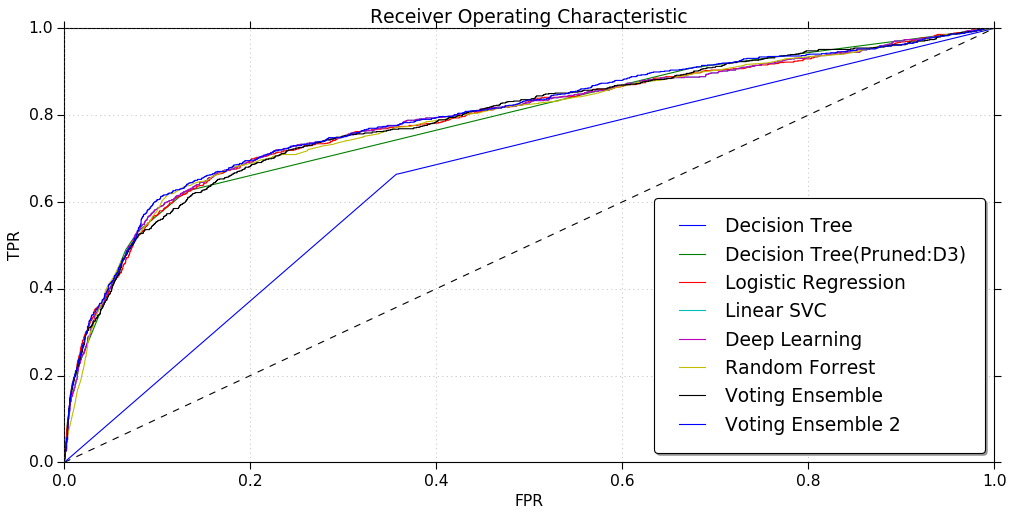


------------------------------------------------------------------------------------------
            1. SELECT THIS MODEL TO MAXIMISE THE RESPONSE RATE FROM CUSTOMERS:            
------------------------------------------------------------------------------------------

Highest PPV+ Model:  Decision Tree (Pruned: Depth-3) 


------------------------------------------------------------------------------------------
                2. SELECT THIS MODEL TO ENSURE GREATEST PREDICTIVE POWER:                 
------------------------------------------------------------------------------------------

Highest AUC Model:   Voting Ensemble 2 



In [64]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline

plt.figure(num=None, figsize=(15, 7), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 14})
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr1, tpr1, label= "Decision Tree")
plt.plot(fpr2, tpr2, label= "Decision Tree(Pruned:D3)")
plt.plot(fpr3, tpr3, label= "Logistic Regression")
plt.plot(fpr4, tpr4, label= "Linear SVC")
#If Deep Learning model has not been run (ie if running locally) then skip:
try:
    fpr8
except NameError:
    pass
else:
    plt.plot(fpr8, tpr8, label= "Deep Learning")
plt.plot(fpr5, tpr5, label= "Random Forrest")
plt.plot(fpr6, tpr6, label= "Voting Ensemble")
plt.plot(fpr7, tpr7, label= "Voting Ensemble 2")
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('Receiver Operating Characteristic')
plt.grid()
plt.xlim(0, 1)
plt.ylim(0, 1) 
plt.legend(loc='lower right', fancybox=True, framealpha=1, shadow=True, borderpad=1)
plt.tick_params(direction='out', length=6, width=1, colors='black', grid_color='grey', grid_alpha=0.8)
plt.show()

#Maximising Response Rate from customers, select this model: 
title(text='1. Select this model to maximise the response rate from customers:')
print("Highest PPV+ Model: ",Results_Table.iloc[Results_Table['Positive Predicted Value'].idxmax(),0],'\n')

#Maximising predictive power of model, select this model: 
title(text='2. Select this model to ensure greatest predictive power:')
print("Highest AUC Model:  ",Results_Table.iloc[Results_Table['AUC / c-statistic'].idxmax(),0],'\n')


In [65]:
Run_4_Results = Results_Table.copy()
Results_Table = []

Run_4_Results["Run"] = '4'
Run_Results_All = Run_Results_All.append(Run_4_Results, sort=False)
Run_Results_All

,Model Name,Positive Predicted Value,Accuracy,AUC / c-statistic,F1 Score,Sensitivity,Train Time,Predict Time,Run
0,Decision Tree,0.320539,0.845584,0.625463,0.327157,0.334054,00:00:00.219168,00:00:00.010093,1
1,Decision Tree (Pruned: Depth-3),0.707207,0.898797,0.784006,0.273758,0.169730,00:00:00.062312,00:00:00.006543,1
2,Logistic Regression,0.698413,0.899769,0.789807,0.299065,0.190270,00:00:00.226808,00:00:00.010164,1
3,Linear SVC,0.672535,0.899526,0.786411,0.315964,0.206486,00:00:00.655039,00:00:00.015625,1
4,Deep Learning Model,0.672535,0.899526,0.786411,0.315964,0.206486,00:02:25.117282,00:00:00.216204,1
5,Random Forrest,0.589011,0.897461,0.779822,0.388406,0.289730,00:00:02.943218,00:00:00.295033,1
6,Voting Ensemble,0.669725,0.901106,0.790258,0.349840,0.236757,00:00:01.084605,00:00:00.046863,1
7,Voting Ensemble 2,0.713693,0.900134,0.798424,0.295026,0.185946,00:00:00.870200,00:00:00.015627,1
0,Decision Tree,0.323681,0.846191,0.629021,0.330867,0.338378,00:00:00.178396,00:00:00.022119,2
1,Decision Tree (Pruned: Depth-3),0.704433,0.897704,0.785658,0.253546,0.154595,00:00:00.046901,00:00:00,2


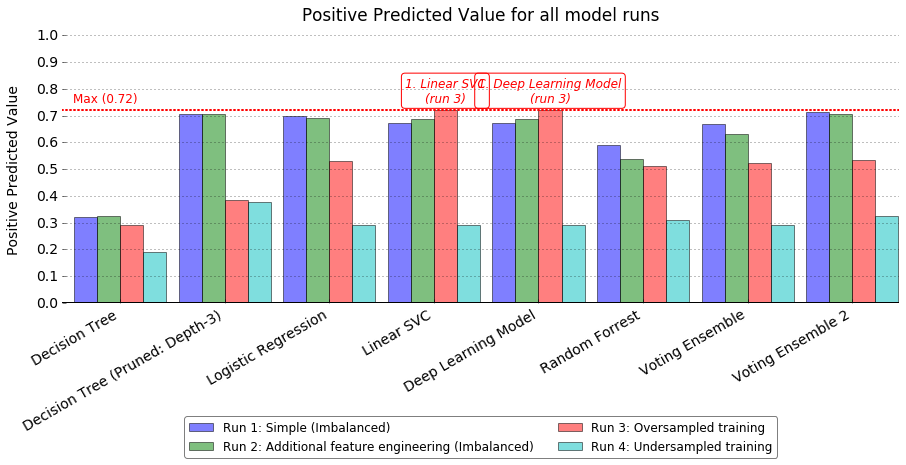

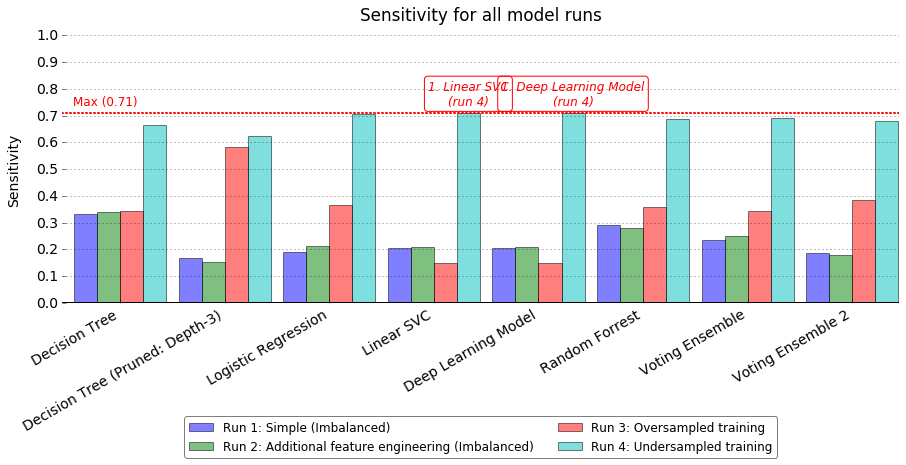

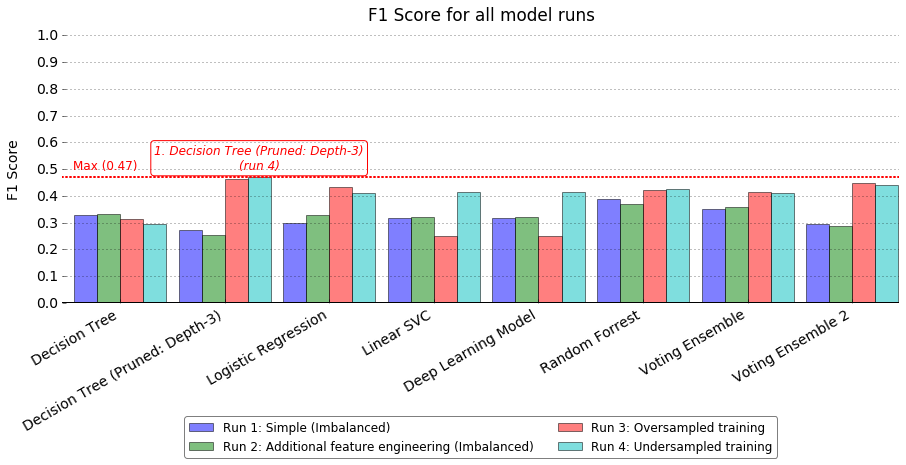

In [66]:
run = 4
plot_metric(run = run, metric='Positive Predicted Value')
plot_metric(run = run, metric='Sensitivity')
plot_metric(run = run, metric='F1 Score')

***
#  PART 7 - Selection & Final Result
***

## 7.1) STEP 15: Model Selection

The winning model by overall Prositive Predicted Value was the **Voting Emsemble 2 model** from the simple Run 1. This is the model that will be selected.

## 7.2) STEP 16: Model Explainability

In [73]:
# Winning model is: R3M4

#Predict the response for test dataset
y_winning_model_pred = R3M4.predict(X_onehot_run1)


#### Surrogate Model (Using a Decision Tree (Pruned to Depth 4))

In [82]:
# Create Decsion Tree object
Surrogate_DecisionTreePruned = DecisionTreeClassifier(criterion    = "entropy", 
                                                      max_depth    = 4, 
                                                      random_state = random_state)

# Train Decision Tree Classifer
clf = Surrogate_DecisionTreePruned.fit(X_onehot_run1,y_winning_model_pred)

#---------------------------------------------------
#Sense Check the accuracy of our decision tree
#---------------------------------------------------
y_pred_surrogate = clf.predict(X_onehot_run1)
y_pred_perc_surrogate = clf.predict_proba(X_onehot_run1)

#Generate metrics
score_acc    = metrics.accuracy_score(y_winning_model_pred, y_pred_surrogate)
score_F1     = metrics.f1_score(y_winning_model_pred, y_pred_surrogate)
score_AUC    = metrics.roc_auc_score(y_winning_model_pred, y_pred_perc_surrogate[:,1])

print("Accuracy:",score_acc)
print("F1 score:",score_F1)
print("AUC     :",score_AUC)

Accuracy: 0.9975213841368584
F1 score: 0.9521126760563381
AUC     : 0.9997757178127709


**Comments:** Surrogate description tree seems to emulate the winning model well, hence we can plot this and try to understand what variables are likely to be influencing the model the most

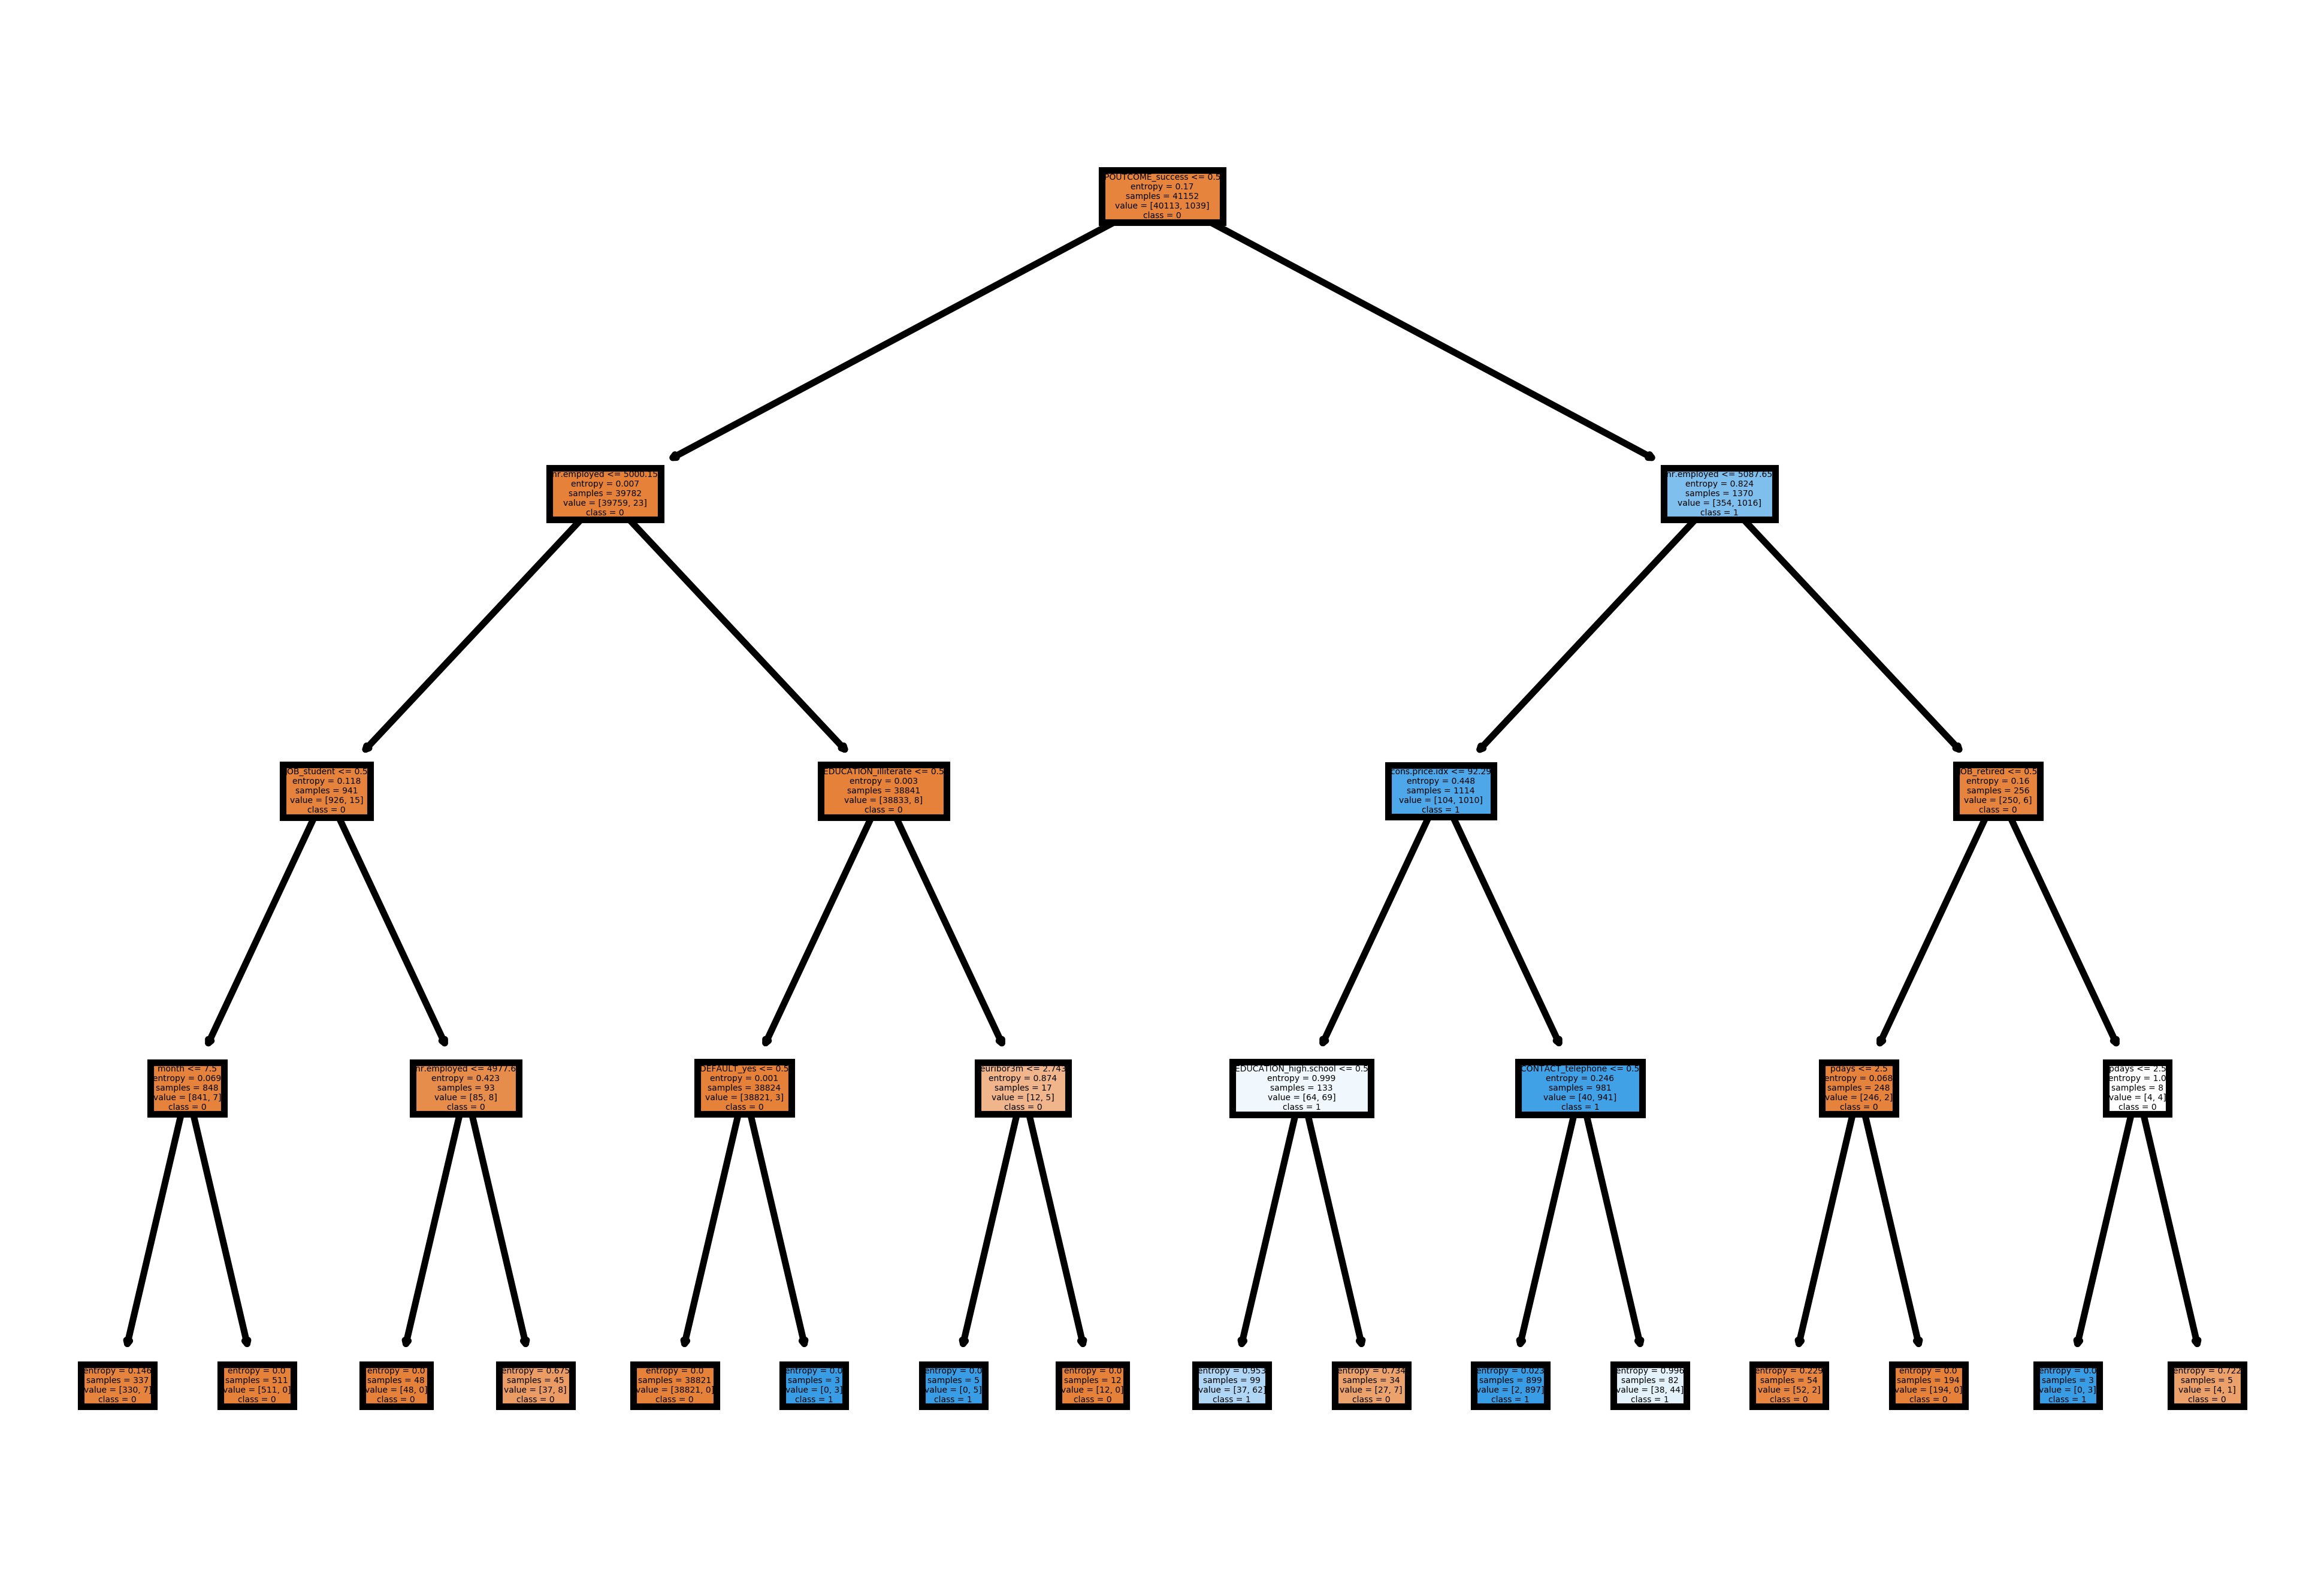

In [83]:
import matplotlib.pyplot as plt
!pip install sklearn
from sklearn import tree
from sklearn.tree import plot_tree

featureNames = X_onehot_run1.columns
targetNames = ['0','1']

# Setting dpi = 300 to make image clearer than default
fig, axes = plt.subplots(dpi=800)

tree.plot_tree(clf,
               feature_names = featureNames, 
               class_names = targetNames,
               filled = True);

fig.savefig(r'C:\Users\harsh\Desktop\imagename.png')
plt.show()

## 7.3) STEP 17: Final Result

Examing the description tree, the variables that influence the positive classifier outcomes of the model's predictions the most are:

>* P_Outcome  
>* nr.employed   
>* Education   
>* Default
>* Euribor3m
>* cons.price.idx 
>* job
>* pdays

The rules they follow, break down as so:

>* P_Outcome (not success) -> nr.employed (<=5000.15) -> Education (Illiterate)     -> Default (Yes)
>* P_Outcome (not success) -> nr.employed (<=5000.15) -> Education (Not Illiterate) -> Euribor3m (<=2.743)
>* P_Outcome (success)     -> nr.employed (<=5087.65) -> cons.price.idx (> 92.29)
>* P_Outcome (success)     -> nr.employed (<=5087.65) -> cons.price.idx (<= 92.29)  -> Education (Not High School)
>* P_Outcome (success)     -> nr.employed (>5087.65)  -> job (retired)              -> pdays (<=2.5)


Conclusion: Overall, the scores received from all models were relatively low in by all performance measures (except accuracy, which is misleading, given the imbalanced nature of negative vs positive classes). Even after feature engineering (which caused information loss and thus lower performance) and handling for the imbalanced proportion of positive and negative classes, the best model performance could only reach a Positive Predicted Value of 0.71. 

Although this was lower than I would have liked, it's still a good score, with an AUC of 78% (i.e. 28% better than taking a 50:50 guess) but  also an F1 score of 0.25.

In conclusion, the variables that determine the model's predictive power are limited and hence one solution would be to collect more data on each of the bank's customers. One particular column that could be useful, would be whether the bank's customers already have other products with them (or other banks). And if so, what value do these have - e.g. do they already have savings/credit accounts, if they have a mortgage with the bank, what's the value of this etc.